# Исследование компьютерных игр

Целью данного проекта является выявление закономерностей, определяющих успешность компьютерных игр. Для данного исследования в нашем распоряжении имеются исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в интернет-магазине "Стримчик".

**Задачи проекта:**

1. Провести предобработку данных для исследования, а именно:  

    - проверить данные на наличие дубликатов, обработать дубликаты
    - проверить данные на наличие пропусков и обработать данные пропуски
    - изменить тип данных, где это необходимо  
    
    
2. Проанализировать данные и ответить на поставленные вопросы
3. Составить портрет пользователя каждого региона
4. Проверить гипотезы
5. Сделать общий вывод по результатам анализа

# Оглавление

1. [Загружаем библиотеки, изучаем данные](#1step)
2. [Подготовка данных](#2step)   
   2.1. [Обработка дубликатов](#2.1step)  
   2.2. [Обработка пропусков](#2.2step)  
   2.3. [Изменение типов данных](#2.3step)  
3. [Анализ данных](#3step)  
   3.1. [Анализ выпуска игр по годам](#3.1step)  
   3.2. [Анализ продаж по платформам](#3.2step)  
   3.3. [Определение периода данных для исследования](#3.3step)  
   3.4. [Анализ потенциально прибыльных платформ](#3.4step)  
   3.5. [Анализ продаж выбранных платформ](#3.5step)  
   3.6. [Анализ взаимосвязи между отзывами и продажами](#3.6step)  
   3.7. [Анализ игр по жанрам](#3.7step)  
4. [Анализ пользователей](#4step)  
   4.1. [Самые популярные платформы по регионам](#4.1step)  
   4.2. [Самые популярные жанры по регионам](#4.2step)  
   4.3. [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#4.3step)  
5. [Проверка гипотез](#5step)  
   5.1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1step)  
   5.2. [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2step)  
6. [Общий вывод](#6step)   

# Шаг 1. Загружаем библиотеки, изучаем данные. <a name="1step"></a>

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

from scipy import stats as st

#библиотеки для визулизации
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option('display.max_columns', 40)

Прочитаем файл data.csv и сохраним его в переменной games:

In [2]:
games = pd.read_csv('/datasets/games.csv')

Просмотрим содержание файла, для этого будет достаточно 10 первых строк:

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


In [4]:
games.shape

(16715, 11)

Данные в файле *games.csv* предствлены 16716 строками и 11 столбцами. Каждая строка относится к определенной игре с индивидуальным названием, платформой и годом выпуска.

Все названия столбцов начинаются с большой буквы, что не удобно для работы, поэтому переименуем столбцы, а именно приведем названия к нижнему регистру:

In [5]:
games.columns = [col.lower() for col in games.columns]

Посмотрим основную информацию о данных, в т.ч. типы данных по столбцам:

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для большего понимания данных, представленных в датасете, воспользуемся методом describe для столбцов с количественными данными:

In [7]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


И для столбцов с категориальными данными:

In [8]:
games.describe(include=['object', 'bool'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Отметим, что столбец *user_score*, который содержит оценку пользователей, имеет формат object и в топе по количеству использований имеет значение tbd, что не похоже на численную оценку. Говоря об оценках под tbd понимается "to be determined" и используется в тех ситуациях, когда количество оценок слишком мало (под слишком мало в разных системах понимается разное число). Оценка начинает отображаться, как средневзвешенная оценка всех оценок пользователей после того, как их количество будет больше определенного нижнего лимита.

## Вывод

Имеющиеся файлы с данными содержат всю необходимую информацию, позволяющую провести анализ компьютерных игр.

Прежде чем приступить к исследованию данных, необходимо будет провести предобработку, а именно:  

1. Проверить данные на дубликаты

2. Исследовать пропуски в 6 столбцах: *name*, *year_of_release*, *genre*, *critic_score*, *user_score*, *rating*:
     * пропуски содержатся только в столбцах с категориальными данными
     * количество пропусков в столбцах *name* и *genre* одинаково и равно 2-м пропускам. Вероятно пропуски в столбце с названиями игр возникли случайно. При этом пропуски в столбце с жанром вероятно появились неслучайно - есть возможность, что жанр подтягивался из других источников в зависимости от названия игры, а если его нет, то нет и жанра. Данное предположение будет работать только если 2 пропуска в столбце *name* и *genre* содержатся в одних и тех же строках. Проверим это при предобработке.  
     
     * пропуски в столбце с годом выпуска игры (*year_of_release*) вероятнее всего случайны, возможно отсутствует информация в открытых источниках о годе выпуска, возможно информация не подтянулась к названиям, если они написаны иначе, чем в источнике с данными о годе 
     
     * большое количество данных пропущено в столбцах *critic_score*, *user_score*, *rating*, то есть в столбцах, описывающих  рейтинг игры. Прежде чем принять решение о способе обработки таких пропусков проанализируем, зависят ли эти пропуски от названия игры или от платформы, или от года выпуска.  
   
   
3. Изменить типы данных: 
    * столбца *year_of_release* на тип даты и времени
    * столбца *user_score* на тип float

# Шаг 2. Подготовка данных. <a name="2step"></a>

## 2.1. Обработка дубликатов. <a name="2.1step"></a>

Проверим данные на наличие дубликатов:

In [9]:
games.duplicated().sum()

0

В датасете дубликаты отсутствуют, значит нам не нужно ничего удалять. Переходим к обработке пропусков.

## 2.2. Обработка пропусков. <a name="2.2step"></a>

In [10]:
missing = games.isnull().sum()
missing_part = missing / len(games)*100

#выводим только те столбцы, где есть пропуски данных (missing или missing_part > 0)
display(pd.DataFrame([missing_part[missing_part>0],pd.Series(missing[missing>0])], index=['percent missing','how many missing']))

,name,year_of_release,genre,critic_score,user_score,rating
percent missing,0.01,1.61,0.01,51.32,40.09,40.48
how many missing,2.00,269.00,2.00,8578.00,6701.00,6766.00


Наглядно объем пропусков можно посмотреть на графике:

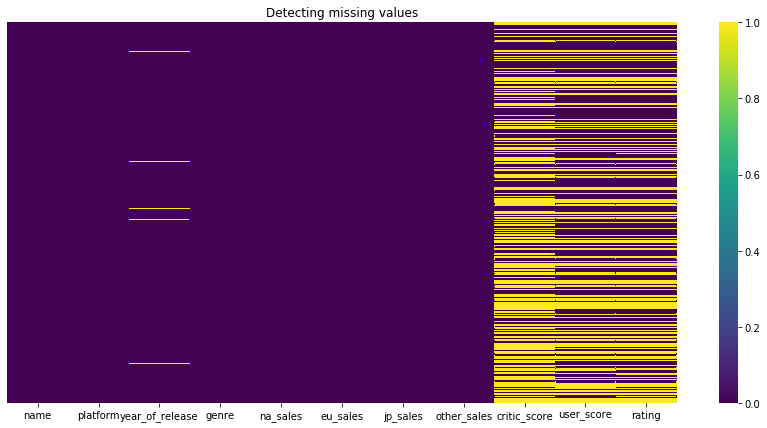

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(games.isnull(), yticklabels=False,cmap='viridis');
plt.title('Detecting missing values');

### Столбцы *name* и *genre*

Проверим, совпадают ли строки с пропусками в столбце *name* с пропусками в столбце *genre*:

In [12]:
games[(games['name'].isnull()) & (games['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Действительно, в датасете 2 строки, в которых не указано название игры и ее жанр. Мы не можем заменить эти значения на какие-либо другие. Кроме того, данные 2 строки составляют 0,01% от всех строк. Удаление этих строк не повлияет на результаты исследования, поэтому мы можем их удалить.

In [13]:
games.dropna(subset=['name','genre'], inplace=True)

### Столбец *year_of_release*

Посмотрим на строки, в которых пропущены значения года выпуска:

In [14]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,nan,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [15]:
games[games['year_of_release'].isnull()]['name'].nunique()

232

In [16]:
games[games['year_of_release'].isnull()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [17]:
games.groupby('name')['year_of_release'].nunique().reset_index().sort_values(by='year_of_release',ascending=False)

,name,year_of_release
8725,SimCity 2000,5
6074,Monopoly,5
4554,Jeopardy!,4
10995,Warriors Orochi 3,4
6403,NBA Jam,4
...,...,...
9533,Swords,0
1406,Charm Girls Club: My Fashion Mall,0
1407,Charm Girls Club: My Fashion Show,0
9532,Sword of the Samurai,0


Информация о годе выпуска в датасете утеряна у 232 игр, в 269 строках, что составляет 1,6% от общего количества строк в датасете. У некоторых игр год, вероятно выпуска, отмечен в названии, но если посмотреть список уникальных игр без указанного года выпуска, можно заметить, что таких игр не так много. Также возможно год в названии не равен году выпуска, как пример игра Madden NFL 2004, год выпуска которой 2003.

Также можно было бы заполнить пропуски на год, в который игра была выпущена на другой платформе, но не всегда одна и та же игра выходит на разных платформах в один и тот же год, например, игра SimCity 2000 была выпущена в 5 разных лет на разных платформах.

Данные в столбце будут активно использоваться в дальнейшем анализе, поэтому есть 2 варианта: восстановить данные из открытых источников или удалить данные из датасета. Восстановление данных из открытых источников займет продолжительное время, поэтому принимая во внимание долю пропусков в общем количестве данных, а именно то, что она достаточно маленькая, принятым решением будет удалить данные из датасета.

In [18]:
games.dropna(subset=['year_of_release'], inplace=True)

### Столбцы *rating*, *user_score*, *critic_score*

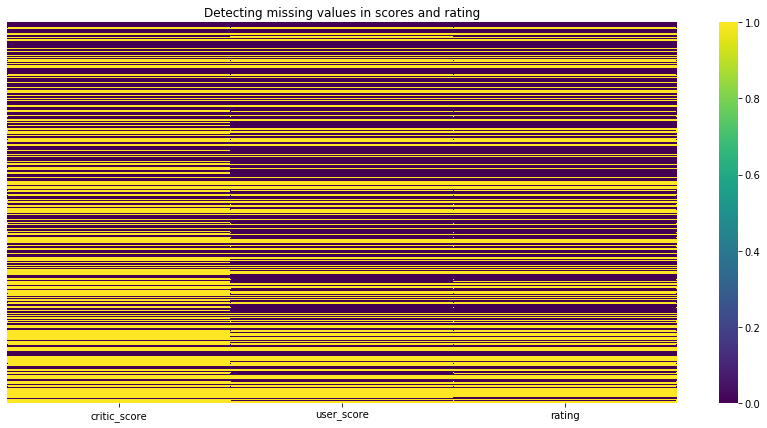

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(games[['critic_score','user_score','rating']].isnull(), yticklabels=False,cmap='viridis');
plt.title('Detecting missing values in scores and rating');

Максимальное количество пропусков в этих трех столбцах наблюдается в столбце, в котором содержится информация об оценке критиков, *critic_score* - 51%. Меньше пропусков в столбцах *user_score* и *rating* - около 40%.

По графику выше видно, что пропуски в столбцах *user_score* и *rating* наблюдаются за некоторыми исключениями у одних и тех же строк. Что касается *critic_score*, то возникает предположение о том, что если пропуски есть в столбцах *user_score* и *rating*, то вероятно они есть в столбце *critic_score*. Этому может быть несколько объяснений, например: 1) игра настолько непопулярна, что ей не был присвоен рейтинг и она не числится в каких-либо сервисах, где играм дают оценку 2) игры были выпущены в период, когда играм еще не присваивался рейтинг и не выставлялись оценки

In [20]:
print('Количество игр, у которых одновременно нет оценки пользователей, критиков и рейтинга:',games[(games['critic_score'].isnull()) & (games['user_score'].isnull()) & (games['rating'].isnull())].shape[0])

Количество игр, у которых одновременно нет оценки пользователей, критиков и рейтинга: 6534


Посмотрим на распределение количества игр с оценками критиков, оценками пользователей и рейтингов по годам:

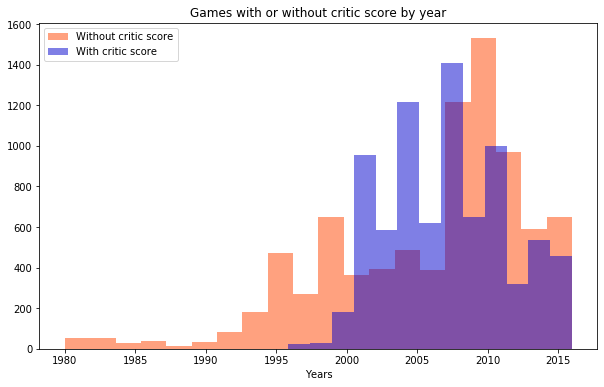

In [21]:
plt.figure(figsize=(10,6))
plt.hist(games[games['critic_score'].isnull()]['year_of_release'],color='orangered',alpha=0.5,label='Without critic score',bins=20);
plt.hist(games[games['critic_score'].notnull()]['year_of_release'],color='mediumblue',alpha=0.5,label='With critic score',bins=20);
plt.title('Games with or without critic score by year');
plt.xlabel('Years');
plt.legend(loc='best');

In [22]:
games[(games['critic_score'].notnull()) & (games['year_of_release'] < 2000)].shape[0]

96

До 2000 года только у 96 игр из датасета имелась оценка критиков. Основная же часть игр с оценками критиков приходится на период после 2000 года. Однако в некоторые периоды и после 2000 года, например, в 2010 году, количество игр без оценок критиков превышает количество игр с оценками.

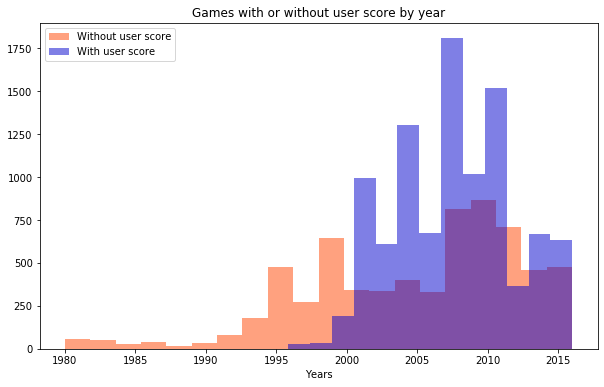

In [23]:
plt.figure(figsize=(10,6))
plt.hist(games[games['user_score'].isnull()]['year_of_release'],color='orangered', alpha=0.5, label='Without user score',bins=20);
plt.hist(games[games['user_score'].notnull()]['year_of_release'],color='mediumblue', alpha=0.5, label='With user score',bins=20);
plt.title('Games with or without user score by year');
plt.xlabel('Years');
plt.legend(loc='best');

In [24]:
games[(games['user_score'].notnull()) & (games['year_of_release'] < 2000)].shape[0]

101

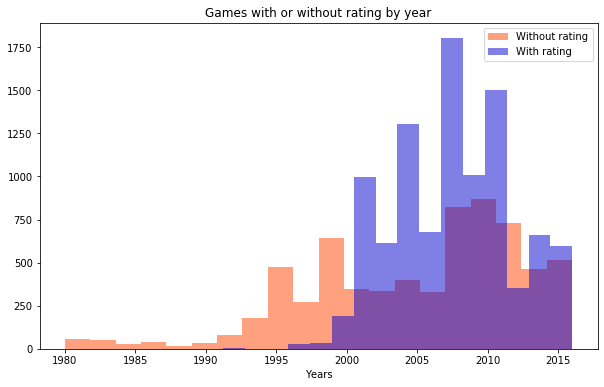

In [25]:
plt.figure(figsize=(10,6))
plt.hist(games[games['rating'].isnull()]['year_of_release'],color='orangered', alpha=0.5, label='Without rating',bins=20);
plt.hist(games[games['rating'].notnull()]['year_of_release'],color='mediumblue', alpha=0.5, label='With rating',bins=20);
plt.title('Games with or without rating by year');
plt.xlabel('Years');
plt.legend(loc='best');

In [26]:
games[(games['rating'].notnull()) & (games['year_of_release'] < 2000)].shape[0]

105

Графики распределения количества игр в зависимости от наличия рейтинга и от наличия оценки пользователей выглядят практически идентично. Они отличаются от графика распределения в зависимости от наличия оценки критиков тем, что после 2000 года не было замечено такого пикового количества игр без оценок. Тем не менее и после 2000 года тем не менее есть игры без рейтингов и оценок.

Пропуски в столбцах с оценками пользователей и оценками критиков, а также рейтингов, могут быть обусловлены разными причинами:
* ошибка сбора данных в таблицу. Если таблица собиралась путем подтягивания к имени разного рода информации из разных источников, то есть вероятность несовпадения написания названия игры в разных источниках, из-за чего не у всех игр есть оценки и рейтинг  
* не все игры обязательно проходят через рейтинг ESRB, наличие рейтинга от этой организации не является обязательным условием для продажи. Более того, данная организация действует в США и Канаде, начиная с 1994 года, в Европе и Японии рейтинги по возрастным ограничениям выставляют другие организации, как Pan European Game Information (PEGI) с 2003 года и Computer Entertainment Rating Organization (CERO) с 2002 года  
* оценки критиков вероятнее всего отсутствуют для игр менее популярных, менее бюджетных, локальных в каких-либо странах. Возможно под оценкой критиков в данном датасете подразумеваются оценки в крупных журналах или крупных агрегаторах, например, Metacritic, но не учитываются оценки критиков на местных сайтах и в местных издательствах  
* что касается оценки пользователей, в целом ситуация схожая. Если имеется ввиду единый агрегатор отзывов, в него вполне могут не входить не сильно популярные игры, игры локальные, либо игры определенного жанра. Если посмотреть на разбивку игр по жанрам и наличию отзывов от пользователей (ниже), можно увидеть,что игры некоторых жанров имеют бОльший процент игр с отсутствующими отзывами. Например, Adventure, Misc, Role-Playing.

In [27]:
genres_user_score = games[games['year_of_release'] > 2000].groupby(['genre',games['user_score'].isnull()])['name'].count().unstack()
genres_user_score.columns=['with score','without score']
genres_user_score['total'] = genres_user_score['with score'] + genres_user_score['without score']
genres_user_score['without score %'] = genres_user_score['without score']/genres_user_score['total']
genres_user_score.sort_values(by='total',ascending=False)

,with score,without score,total,without score %
genre,,,,
Action,2131,904,3035,0.30
Sports,1451,447,1898,0.24
Misc,863,714,1577,0.45
Role-Playing,729,542,1271,0.43
Adventure,446,732,1178,0.62
Shooter,980,129,1109,0.12
Racing,825,167,992,0.17
Simulation,556,197,753,0.26
Platform,544,152,696,0.22


В первом шаге уже было отмечено, что в столбце user_score встречается оценка tbd. Для нашего анализа tbd можно заменить на пропуск, поскольку по факту оценки пока еще нет.

In [28]:
games['user_score'] = games['user_score'].replace(to_replace='tbd',value=np.nan)

Несомненно отсутствие информации об оценках и рейтинге существенной доли игр не позволит нам в полной мере оценить влияние этих показателей на продажи, на корреляцию между показателями, на различие средних для разных платформ и жанров. Однако мы не можем заполнить информацию на основании имеющихся данных по другим играм, поскольку каждая игра индивидуальна. Поэтому мы продолжим анализ при этом понимая, что делаем выводы на ограниченной выборке игр.

## 2.3. Изменение типов данных. <a name="2.3step"></a>

В первом шаге после предварительного просмотра данных были намечены следующие изменения типов данных:
* *year_of_release* на тип даты и времени
* столбца *user_score* на тип float



In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 2.1+ MB


In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [31]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

In [32]:
games['user_score'] = games['user_score'].astype('float')

## Вывод.

Была сделана предобработка данных, а именно:

* данные были проверены на наличие дубликатов, дубликаты отсутствуют  


* пропуски в данных были обработаны следующим образом:
    * строки с пропущенными названиями игры и жанром были удалены, поскольку они составляли 0,01% от всех данных, а восстановление этой информации невозможно
    * строки с пропущенными годами выпуска игр также были удалены, также по причине того, что они составляю лишь 1,6% данных, а также потому, что заполнить эти пропуски корректно не представляется возможным не обращаясь к сторонним источникам
    * пропуски в оценках критиков, оценках пользователей и рейтинге организации ESRB оставляем незаполненным. Отсутствие этих значений может быть обусловлено небольшой популярностью игры, отсутствию игры в крупных агрегаторах отзывов. Мы не можем заполнить эти пропуски на основании данных по другим играм.
    
    
* типы данных были изменены

Предобработка данных завершена, следовательно можно приступить к анализу данных.

## Шаг 3. Анализ данных. <a name="3step"></a>

### 3.1. Анализ выпуска игр по годам. <a name="3.1step"></a>

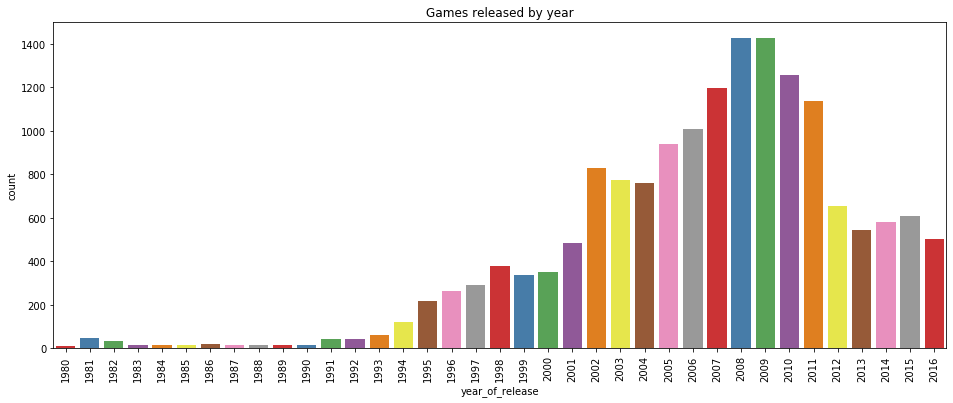

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(games['year_of_release'],palette='Set1');
plt.xticks(rotation=90);
plt.title('Games released by year');

Посмотрим на график выпуска игр по годам:

* до 1994 года включительно ежегодно выпускалось менее 200 игр, тем не менее с начала 90х их количество начало расти
* в 2006 году впервые количество выпущеных игр превысило 1000 игр
* до 2008 года количество выпускаемых игр увеличивалось, с некоторыми пиками (1998, 2002), но в целом тренд был на увеличение выпуска
* самыми "богатыми" на выпуск годами были 2 года: 2008 и 2009, количество выпущенных игр в эти годы примерно одинаково, около 1400 игр/год
* после 2009 года наблюдается тренд на снижение выпуска, в 2015 году количество выпущенных игр составляло меньше, чем в 2003-2004 годах

### 3.2. Анализ продаж по платформам. <a name="3.2step"></a>

**Задача:** Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [34]:
#добавим столбец с общими продажами
games['total_sales'] = games['na_sales'] + games['eu_sales']+ games['jp_sales'] + games['other_sales']

Посмотрим, как распределялись продажам по разным платформам в разных регионах продаж:

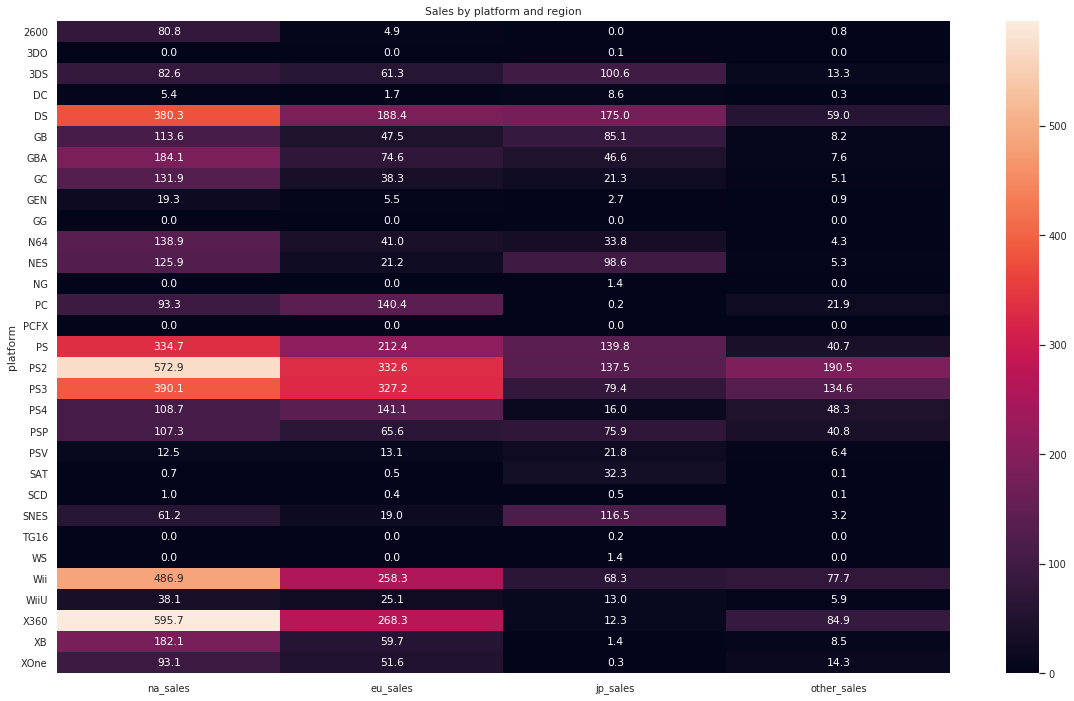

In [35]:
platform_df = games.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum()

plt.figure(figsize=(20, 12))
sns.set(font_scale=0.9)
sns.heatmap(platform_df.loc[:,'na_sales':'other_sales'], annot=True,fmt='.1f');
plt.title('Sales by platform and region');

Самые высокие продажи по таким платформам, как DS, PS, PS2, PS3, DS, Wii, X360 приходятся на продажи в Северной Америке. По многим другим платформам продажи в Северной Америке также превышают продажи в других регионах. Тем не менее можно заметить, что продажи игр на некоторых платформах , к примеру 3DS или SNES, выше в Японии.


Интересно посмотреть не только на абсолютные значения продаж, но и на процентное распределение по продажам в разных регионах. Посчитаем проценты продаж по каждой платформе и каждому региону к общим продажам. Сумма процентов по строке (по платформе) равна 100%.

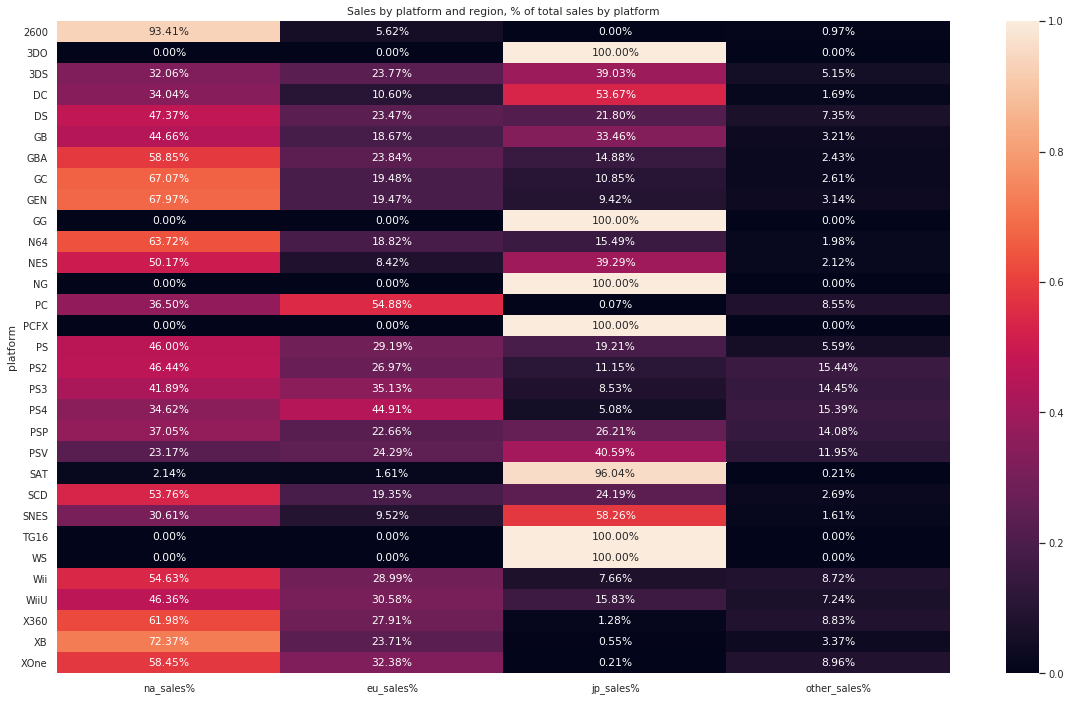

In [36]:
platform_df['na_sales%'] = platform_df['na_sales']/platform_df['total_sales']
platform_df['eu_sales%'] = platform_df['eu_sales']/platform_df['total_sales']
platform_df['jp_sales%'] = platform_df['jp_sales']/platform_df['total_sales']
platform_df['other_sales%'] = platform_df['other_sales']/platform_df['total_sales']
plt.figure(figsize=(20, 12))
sns.set(font_scale=0.9)
sns.heatmap(platform_df.loc[:,'na_sales%':'other_sales%'],annot=True, fmt = '.2%');
plt.title('Sales by platform and region, % of total sales by platform');

На графике очень заметен перекос продаж в сторону продаж в Северной Америке. Также мы видим яркие точки со 100% продажами в Японии, вероятно это локальные платформы и продажи игр на этих платформах не распространялись на другие страны.

In [37]:
print('Всего количество уникальных платформ в датасете:',games['platform'].nunique())

Всего количество уникальных платформ в датасете: 31


In [38]:
platform_df.sort_values(by='total_sales', ascending=False, inplace=True)
platform_df

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_sales%,eu_sales%,jp_sales%,other_sales%
platform,,,,,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56,0.46,0.27,0.11,0.15
X360,595.74,268.32,12.30,84.88,961.24,0.62,0.28,0.01,0.09
PS3,390.13,327.21,79.41,134.59,931.34,0.42,0.35,0.09,0.14
Wii,486.87,258.32,68.28,77.71,891.18,0.55,0.29,0.08,0.09
DS,380.31,188.41,175.02,59.04,802.78,0.47,0.23,0.22,0.07
PS,334.72,212.39,139.78,40.69,727.58,0.46,0.29,0.19,0.06
PS4,108.74,141.09,15.96,48.35,314.14,0.35,0.45,0.05,0.15
GBA,184.12,74.59,46.56,7.61,312.88,0.59,0.24,0.15,0.02
PSP,107.27,65.62,75.88,40.76,289.53,0.37,0.23,0.26,0.14


In [39]:
#выберем топ-10 платформ по общим продажам
platform_topsales = platform_df.loc[:'3DS','total_sales']
platform_topsales

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.78
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
Name: total_sales, dtype: float64

In [40]:
print('Доля продаж топ-10 платформ в общих продажах:{:.2%}'.format(platform_topsales.sum()/platform_df['total_sales'].sum()))

Доля продаж топ-10 платформ в общих продажах:76.26%


Диаграмма размаха по всем платформам позволит увидеть, в какие периоды выпускались игры на тех или иных платформах, какая была длительность этих периодов выпуска новых игр, игры каких платформ к 2016 году продолжают выпускаться.

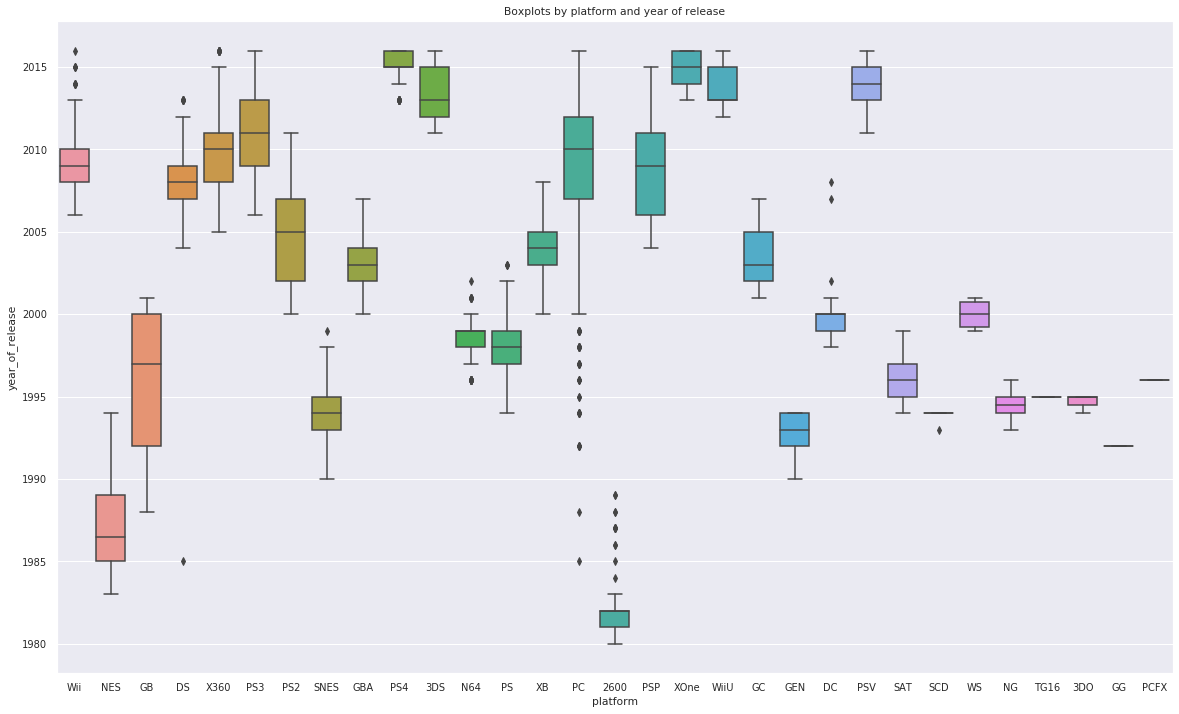

In [41]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='platform',y='year_of_release', data=games);
plt.title('Boxplots by platform and year of release');

На диаграмме видно, что такие платформы, как 2600, 3DO, NG, SAT, GEN, SNES перестали выпускать игры еще до 2000 года, как и платформы GG, DS, SCD, TG16 количество игр у которых было крайне небольшим, так что мы их практически не видим на графике.

Построим аналогичный график, но только для топ-10 платформ по продажам:

In [42]:
platform_by_year_top = games.query('platform in @platform_topsales.index').reset_index()

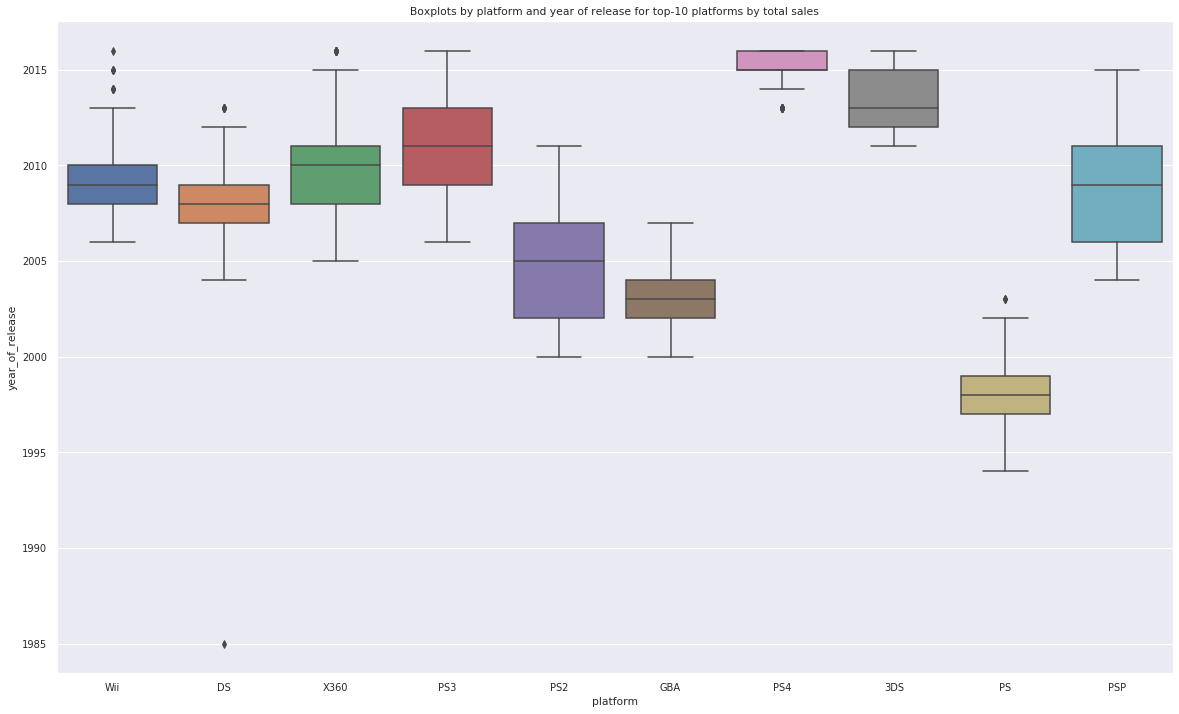

In [43]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='platform',y='year_of_release', data=platform_by_year_top);
plt.title('Boxplots by platform and year of release for top-10 platforms by total sales');

На укрупненном графике по топ-10 платформ, отобранных по общим продажам игр на этих платформах, очень наглядно видно развитие платформы PlayStation от просто PS до PS4. В целом можно заметить, что выбросов практически нет, за редкими исключениями. 

Из всех представленных платформ, топ-10 по продажам, только платформа PS4 находится на стадии активного выпуска новых игр по состоянию на 2016 год. 

В таблице можно увидеть в какой год был первый и последний выпуск игры на определенной платформе. Если игры продолжают выпускать в 2016 году, то последний год = 2016.

In [44]:
platform_by_year_top.groupby('platform')['year_of_release'].agg({'min','max'})

,max,min
platform,,
3DS,2016,2011
DS,2013,1985
GBA,2007,2000
PS,2003,1994
PS2,2011,2000
PS3,2016,2006
PS4,2016,2013
PSP,2015,2004
Wii,2016,2006


Интересно будет посмотреть на график продаж по году выпуска и в зависимости от платформы:

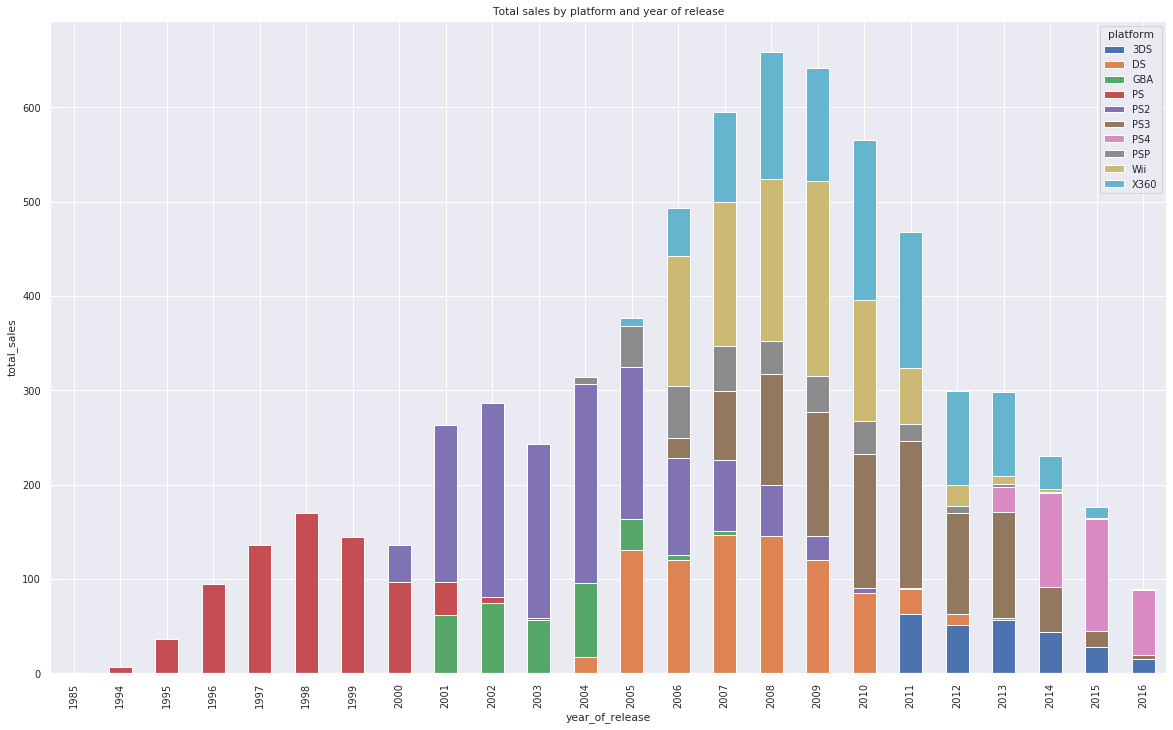

In [45]:
platform_by_year_top.groupby(['year_of_release','platform'])['total_sales'].sum().unstack().plot(kind='bar',
                                                                                                 stacked=True,figsize=(20, 12));
plt.title('Total sales by platform and year of release');
plt.ylabel('total_sales');

На таком графике видно, какой вклад в том или ином году вносили платформы в сумму общих продаж. Видно, как одни платформы заменяют другие, иногда новые платформы продаются больше и успешнее других, иногда меньше. 

Продажи игр на некоторых платформах достигают высоких значений уже в первый год выпуска, для других первый год менее прибыльный. Несомненно это также зависит и от того, в какой месяц выпускаются игры - разная ситуация для игр, выпущенных в январе и в декабре.

Построим графики для каждой платформы из топ-10, так будет более наглядно видно, как проходит цикл выпуска и продаж для каждой платформы.

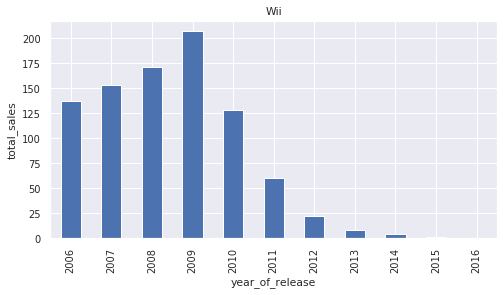

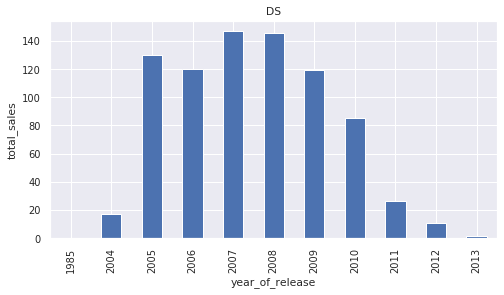

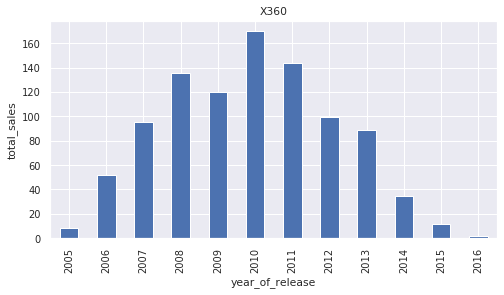

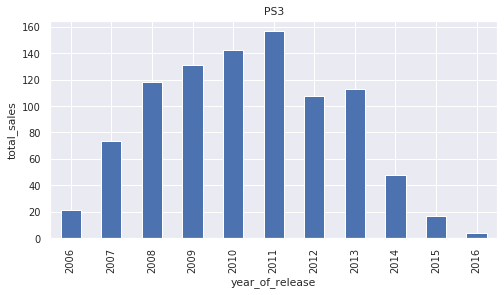

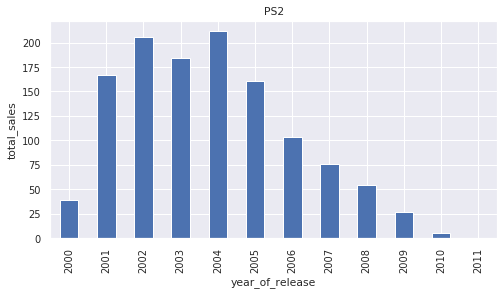

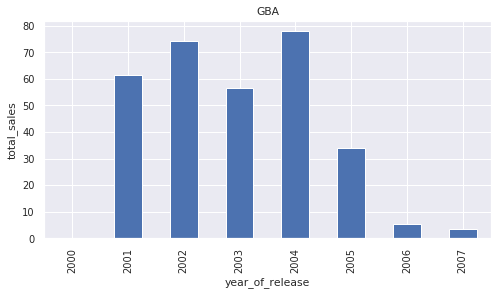

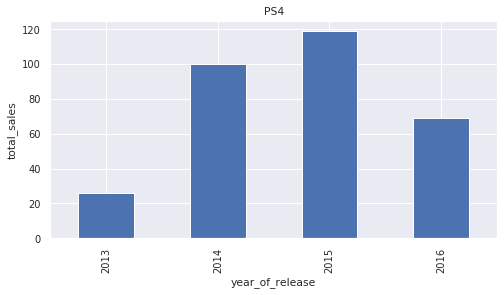

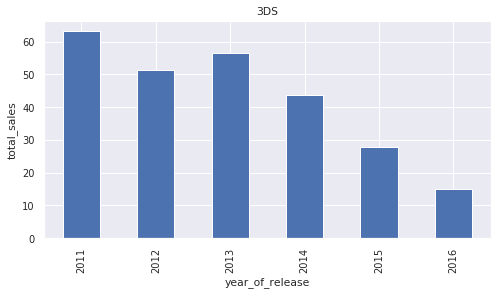

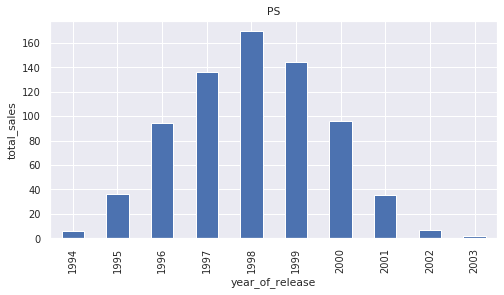

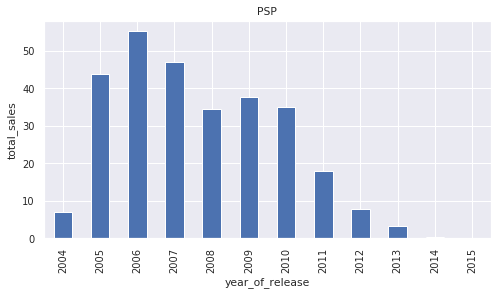

In [46]:
for platform in platform_by_year_top['platform'].unique():
    (platform_by_year_top.query('platform == @platform')
                         .groupby('year_of_release')['total_sales']
                         .sum()
                         .plot(kind='bar',figsize=(8, 4))
    );
    plt.title(platform);
    plt.ylabel('total_sales');
    plt.show()

По выбранному топ-10 платформ можно определить некий средний период, в рамках которого платформа приносит прибыль. Проведем предварительный анализ графиков по каждой платформе и выдвинем предположение о том, что средний жизненный цикл платформы, в течение которого платформа получает основную часть прибыли, составляет 8 лет. 

Под основной частью прибыли будем понимать 90% и более.

Проверим, насколько предположение соответствует реальности:

In [47]:
for platform in platform_by_year_top['platform'].unique():
    #у платформы DS есть выброс - первая игра в 1985 году, затем до 2004 года не было выпусков, поэтому пропишем разные условия 
    if platform == "DS":
        min_year = (platform_by_year_top[platform_by_year_top['year_of_release'] > 2000]
                                       .query('platform == @platform')['year_of_release'].min())
    else:
        min_year = platform_by_year_top.query('platform == @platform')['year_of_release'].min()
    
    #прибавляем 7 лет, поскольку еще один год - первый, минимальный
    min_year_plus_lifecycle = min_year + 7
    query = platform_by_year_top.query('platform == @platform and @min_year <= year_of_release <= @min_year_plus_lifecycle')\
                                                                                                       ['total_sales'].sum()
    total = platform_by_year_top.query('platform == @platform')['total_sales'].sum()
    print(platform,'{:.2%}'.format(query / total))

Wii 99.43%
DS 98.43%
X360 85.77%
PS3 92.68%
PS2 93.00%
GBA 100.00%
PS4 100.00%
3DS 100.00%
PS 98.80%
PSP 96.14%


Платформы PS4 и 3DS показывают 100% долю, однако если посмотреть на графики по этим платформам, то можно заметить, что:
* первый выпуск игры на платформе 3DS состоялся в 2011 году, а прибавляя 7 лет к 2011 году мы получаем 2018 год, а наши данные заканчиваются в 2016 году
* первый выпуск игры на платформе PS4 состоялся в 2013 году, то есть прибавляя 7 лет мы получаем 2020 год, для которого у нас пока нет данных

Из топ-10 платформ, которые мы рассматриваем только две эти платформы начали выпускать игры менее чем за 8 лет до 2016 года, поэтому для других платформ наш расчет абсолютно корректный.

По игре X360 мы получили 86% продаж за 8 лет, но поскольку это единственная платформа с таким значением и это значение незначительно ниже 90%, не будем увеличивать жизненный цикл до 9 лет.

### 3.3. Определение периода данных для исследования. <a name="3.3step"></a>

**Задача:** Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

В предыдущем шаге был выбран средний период, за который платформа приносит бОльшую часть прибыли, 8 лет. 
Таким образом можно сказать, что платформы, которые начали выпускать игры до 2009 года, к 2017 году вероятнее всего уже получили основную часть прибыли и даже прекратили выпуск. Поэтому для дальнейшего анализа сделаем срез: оставим данные только начиная с 2009 года.

In [48]:
games_actual = games.query('year_of_release >= 2009')

### 3.4. Анализ потенциально прибыльных платформ. <a name="3.4step"></a>

**Задача:** Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

**Графики по продажам**

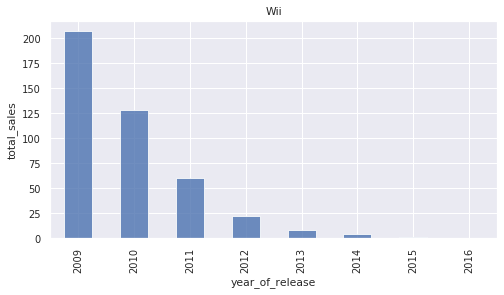

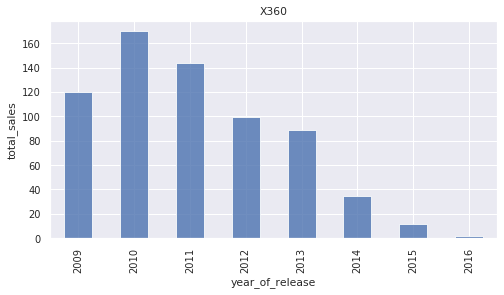

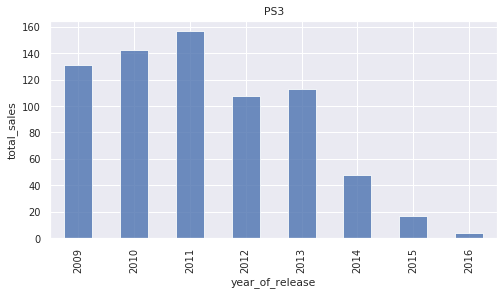

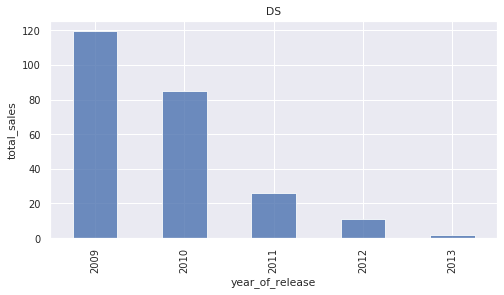

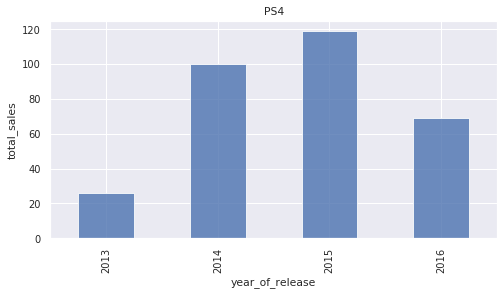

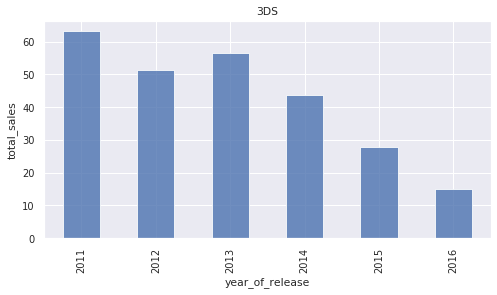

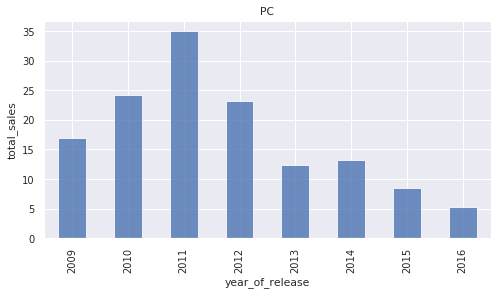

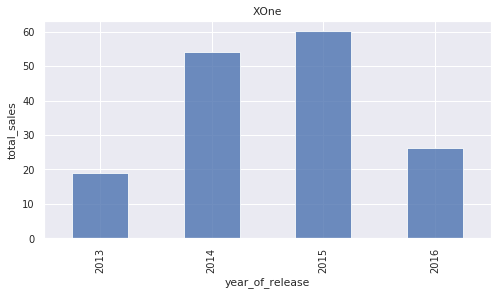

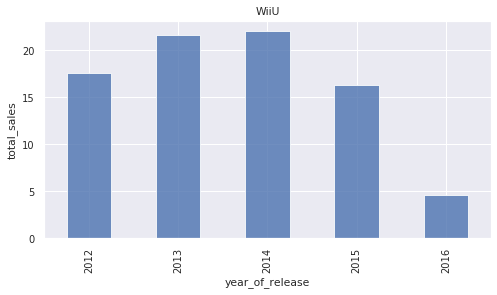

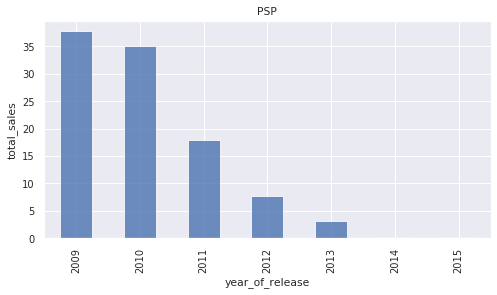

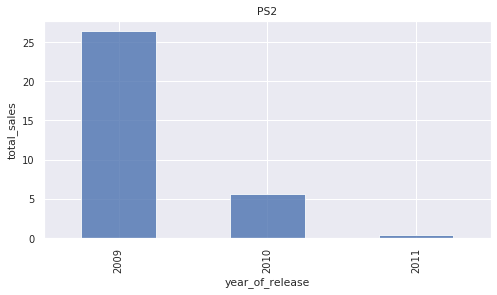

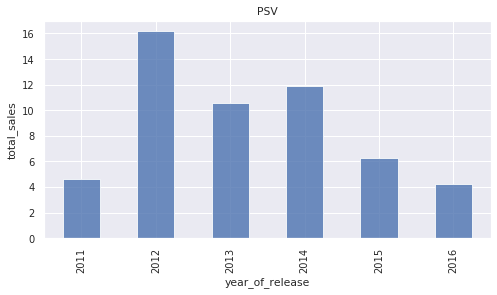

In [49]:
for platform in games_actual['platform'].unique():
    games_actual.query('platform == @platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar',alpha=0.8,figsize=(8, 4));
    plt.title(platform);
    plt.ylabel('total_sales');
    plt.show();

**Графики по выпуску**

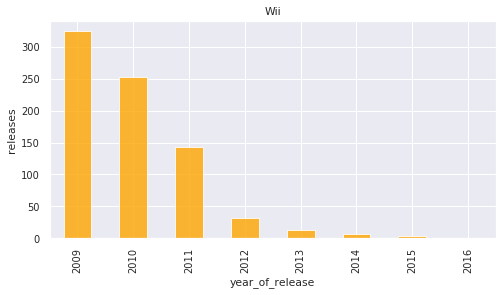

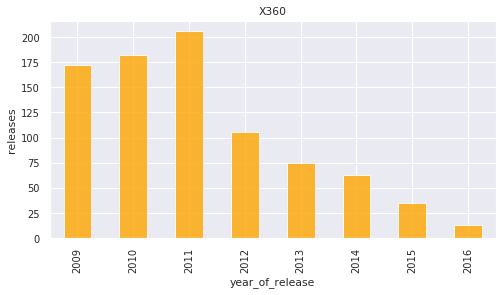

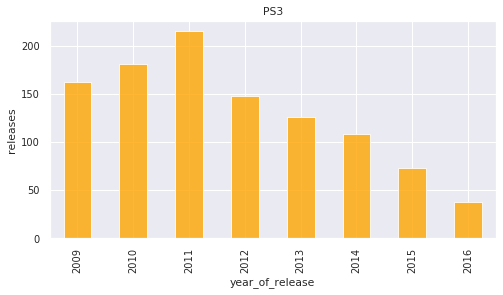

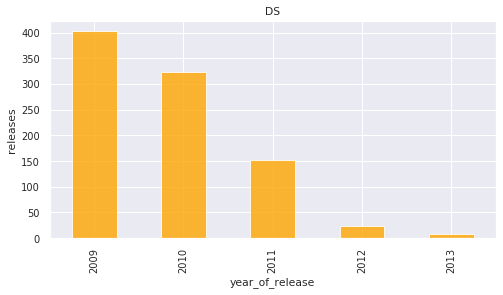

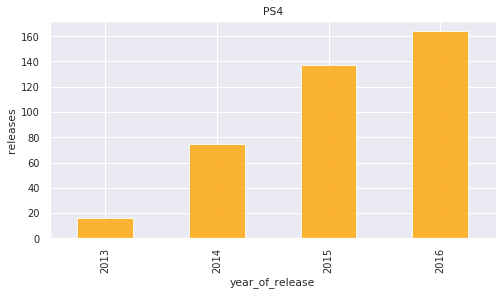

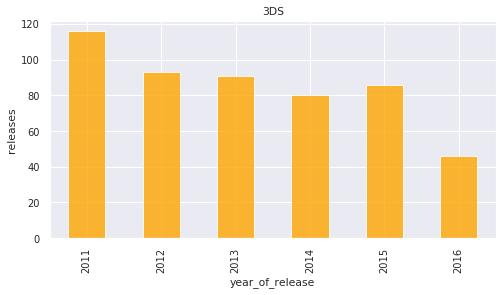

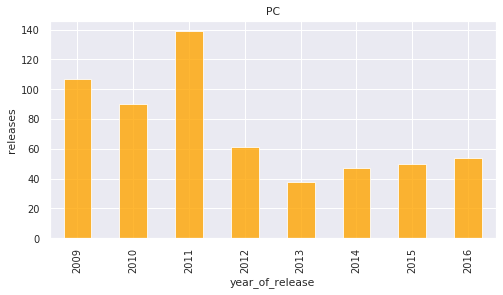

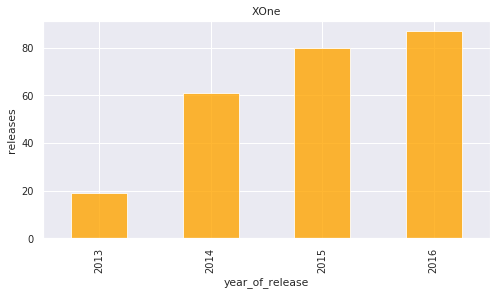

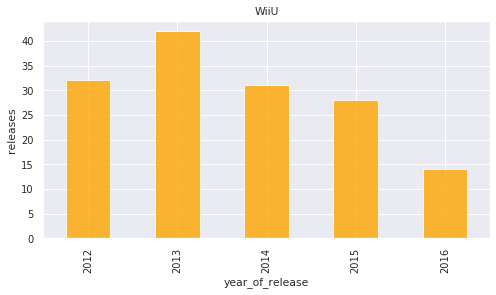

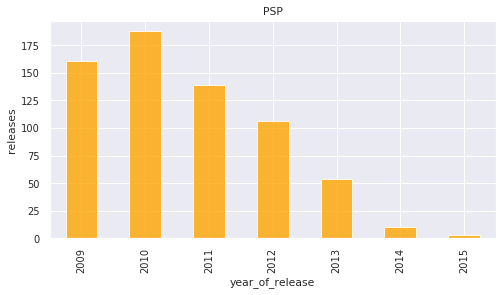

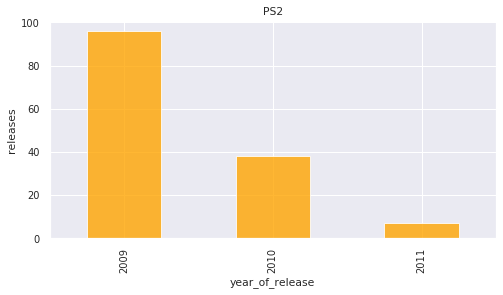

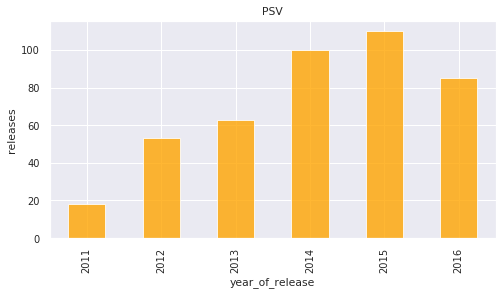

In [50]:
for platform in games_actual['platform'].unique():
    games_actual.query('platform == @platform').groupby('year_of_release')['name'].count().plot(kind='bar',color='orange',alpha=0.8,figsize=(8, 4));
    plt.title(platform);
    plt.ylabel('releases');
    plt.show();

По графикам можно сделать следующие выводы о платформах, выпуск новых игр и продажи которых относятся к периоду 2011-2016 гг.:

* **Wii** - в 2016 году выпуска новых игр практически нет, ежегодно с 2009 года заметен тренд на снижение выпуска


* **X360** - тренд очень похожий, выпуск продолжается, но имеет место однозначный тренд на снижение. Продажи также ежегодно снижаются, продажи игр, выпущенных в 2015 году составляли около 10 млн долларов, против около 170 млн долларов за игры, выпущенные в 2010 году


* **PS3** - выпуск игр продолжается, в 2015 году было выпущено около 75 новых игр, однако их количество ежегодно снижается, как и снижаются продажи начиная с 2011 года  


* **DS** - после 2013 года выпуска новых игр не было


* **PS4** - первые выпуски начались в 2013 году и до 2016 года наблюдается тренд на увеличение ежегодного выпуска. Продажи за игры, выпущенные в 2016 году ниже, чем в 2015, однако согласно предоставленной информации данные за 2016 год неполные, поэтому будем считать, что снижение продаж за выпуск 2016 года, которое видно на графике, лишь следствие недостатка информации


* **3DS** - выпуск игр продолжается в 2016 году, ввиду неполной информации за 2016 год есть риск, что снижения выпуска в 2016 году не было. Однако что касается продаж, продажи игр, выпущенных в 2015 уже заметно ниже чем продажи игр, выпущенных в 2014 году. Вероятно это связано с тем, что период основных продаж данной платформы близится к завершению


* **PC** - за резким сокращением выпуска более чем в 2 раза в 2012 году сначало последовало еще одно менее значительное снижение в 2013 году, затем ситуация с выпуском стабилизировалась и даже наметился некоторый тренд на незначительное увеличение ежегодного выпуска. При этом продажи игр на этой платформе наоборот продолжают снижаться, что говорит скорее всего о снижении популярности игр на этой платформе


* **XOne** - заметный тренд на увеличение выпуска начиная с 2013, первого года выпуска игр на этой платформе. Продажи выпускаемых игр растут, снижение на графике в 2016 год вероятнее всего связано с неполнотой информации по этому году


* **WiiU** - начиная с 2013 года ежегодно снижаются выпуски и продажи выпускаемых игр


* **PSP** - в 2016 году выпуска новых игр не было


* **PS2** - выпуски новых игр прекратились в 2011 году


* **PSV** - в 2016 году продолжается выпуск игр, но продажи сокращаются


Выведем таблицу для каждой платформы с годом начала выпуска и годом предполагаемого окончания жизненного цикла:

In [51]:
for platform in games_actual['platform'].unique():
    min_year = games_actual.query('platform == @platform')['year_of_release'].min()
    min_year_plus_lifecycle = min_year + 7
    print(platform,min_year,min_year_plus_lifecycle)

Wii 2009 2016
X360 2009 2016
PS3 2009 2016
DS 2009 2016
PS4 2013 2020
3DS 2011 2018
PC 2009 2016
XOne 2013 2020
WiiU 2012 2019
PSP 2009 2016
PS2 2009 2016
PSV 2011 2018


Исходя из этого, мы можем выбрать несколько платформ, продажи которых будут продолжаться как минимум в 2017 году:

**1.** PS4  
**2.** 3DS  
**3.** XOne  
**4.** WiiU  
**5.** PSV  
**6.** PC (несмотря на то, что жизненный цикл платформы по нашим расчетам заканчивается в 2016 году, тем не менее мы видим, что выпуски игр на этой платформе продолжаются и вероятно будут продолжаться еще довольно продолжительный период времени ввиду особенности платформы (персональный компьютер))

In [52]:
profit_list = ["PS4","3DS","XOne","WiiU","PSV","PC"]
profit_games = games_actual.query('platform in @profit_list')

### 3.5. Анализ продаж выбранных платформ. <a name="3.5step"></a>

**Задача:** Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

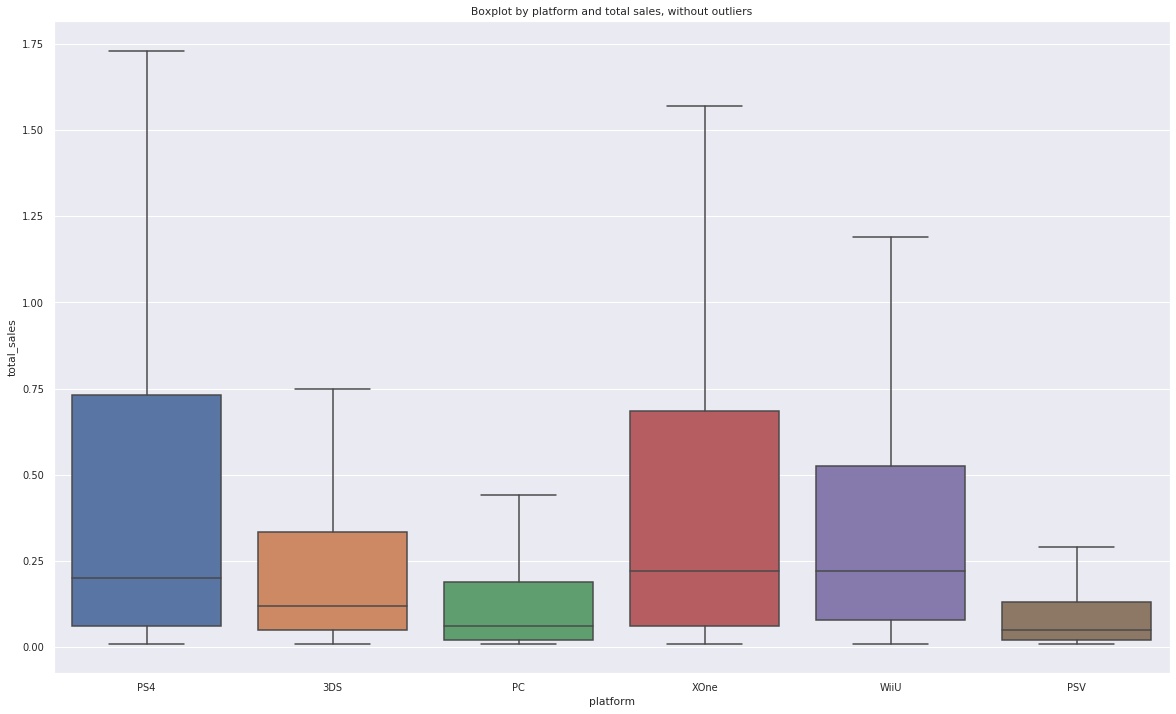

In [53]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=profit_games, x='platform',y='total_sales',showfliers=False);
plt.title('Boxplot by platform and total sales, without outliers');

**Первое**, что можно отметить на диаграмме размаха, это разная высота и "ящиков", и ящиков с добавлением "усов". Те платформы, у которых диаграмма более длинная вверх, имеют более широкое распределение, данные у таких платформ менее плотные, в рамках таких платформ выпускались очень разные по прибыльности игры. Это такие платформы, как PS4,XOne, немного меньше диаграмма у WiiU.
Другие платформы, как PC и PSV наоборот имеют более узкое распределение, данные более плотные, на таких платформах есть и более прибыльные игры, но в основной массе игры на этих платформах не приносят больших продаж.

**Второе**, что отмечается на диаграмме - разные медианы по прибыльности.Несмотря на то, что диаграмма размаха платформы PS4 более высокая, медиана продаж у нее незначительно, но ниже, чем у платформ XOne и WiiU, диаграммы размахов которых менее длинные.  
Если расставить платформы по убыванию медиан продаж игр, список будет выглядеть следующим образом: XOne, WiiU, PS4, 3DS, PC, PSV.

Построим диаграмму размаха с выбросами:

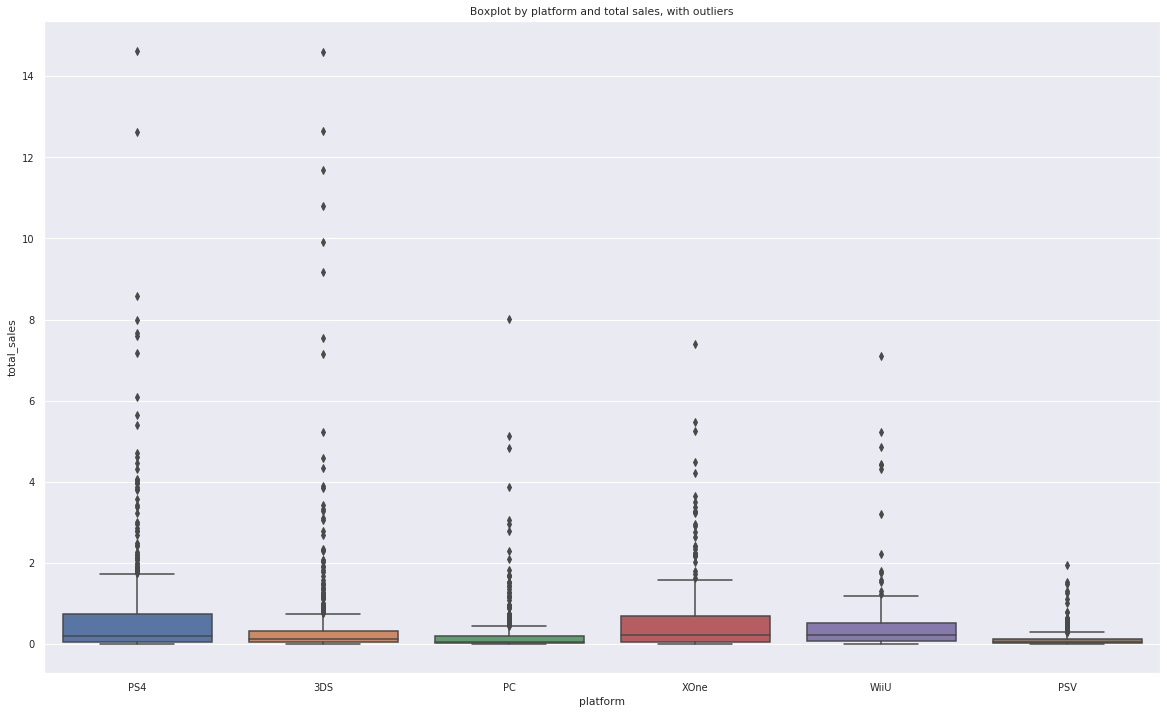

In [54]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=profit_games, x='platform',y='total_sales',showfliers=True);
plt.title('Boxplot by platform and total sales, with outliers');

Каждая из платформ имеет достаточно много выбросов с большим размахом значений, за исключением платформы PSV. Из всех шести отобранных платформ только у двух платформ: PS4 и 3DS выпускались сравнительно очень прибыльные игры, мы видим у этих платформ игры с продажами сверх 10 млн долларов. Если построить графики распределения, выбросы превратились бы в длинные хвосты справа:

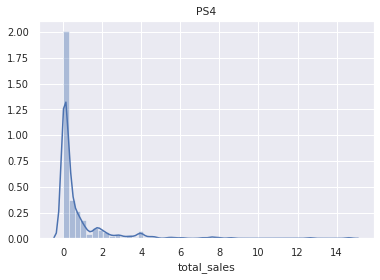

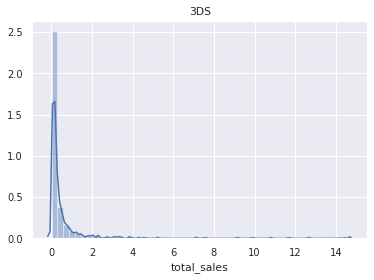

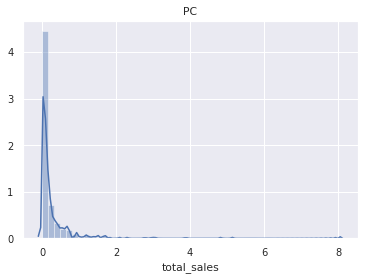

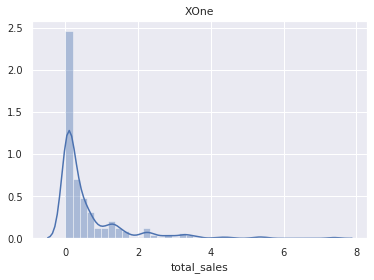

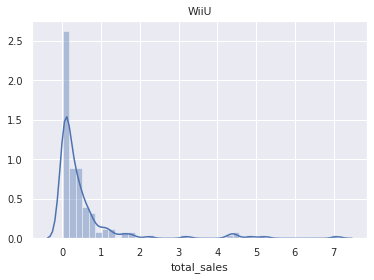

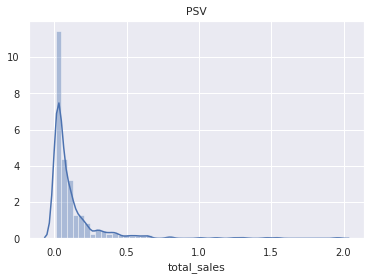

In [55]:
for platform in profit_games['platform'].unique():
    sns.distplot(profit_games.query('platform == @platform')['total_sales'])
    plt.title(platform);
    plt.show()

### 3.6. Анализ взаимосвязи между отзывами и продажами. <a name="3.6step"></a>

**Задача 1:** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**Задача 2:** Соотнесите выводы с продажами игр на других платформах.

Для данных задач нам потребуется датасет без пропусков в столбцах user_score и critic_score.

In [56]:
print('Количество наблюдений до очистки от пропусков:', len(profit_games))
scores_df = (profit_games[(profit_games['critic_score'].notnull()) 
                          & (profit_games['user_score'].notnull())]
            )
print('Количество наблюдений после:',len(scores_df))

Количество наблюдений до очистки от пропусков: 2313
Количество наблюдений после: 1201


In [57]:
scores_df['critic_score'] = scores_df['critic_score'].astype('int')

Для выполнения **Задачи 1** возьмем платформу XOne.

In [58]:
xone_df = scores_df.query('platform == "XOne"')

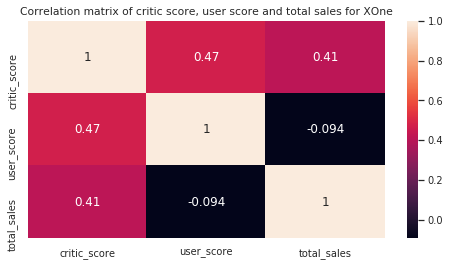

In [59]:
corrmap = xone_df[['critic_score','user_score','total_sales']]
plt.figure(figsize=(8,4));
sns.heatmap(corrmap.corr(), annot=True,annot_kws={'size': 12});
plt.title('Correlation matrix of critic score, user score and total sales for XOne');

Для платформы XOne:

**1)** Коэффициент корреляции Пирсона между отзывами критиков и отзывами пользователей составляет 0.47. Корреляция положительная, но не высокая.  

**2)** Корреляция между отзывами критиков и продажами также положительная, составляет 0.41, корреляцию можно назвать средней. В целом данный показатель логичный, чем выше оценка критиков, тем больше пользователей приобретут игру только по причине высокой оценки от критиков. Оценка критиков является показательной не для всех пользователей, но для какой-то значимой части.  

**3)** Корреляция между продажами и отзывом пользователей практически отсутствует, коэффициент отрицательный, но составляет всего -0.1. Вероятно это связано с тем, что пользователи больше доверяют оценке критиков при покупке игры, нежели оценке других пользователей. Кроме того, оценки пользователей часто носят субъективный характер.

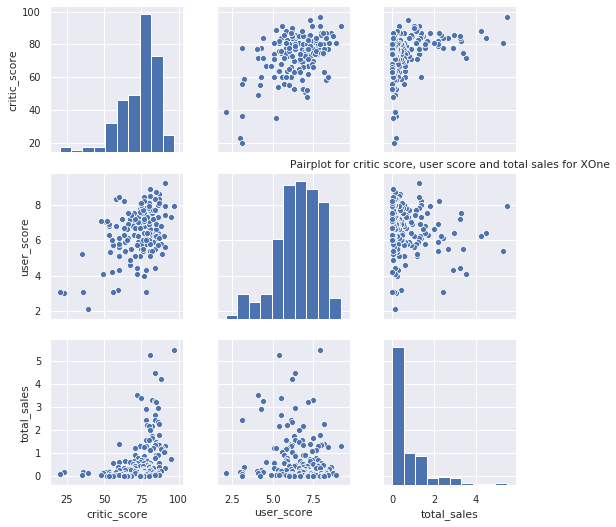

In [60]:
sns.pairplot(corrmap);
plt.title('Pairplot for critic score, user score and total sales for XOne');

In [61]:
print('Critic score')
display(xone_df['critic_score'].agg({'mean','median'}))
print()
print('User_score')
display(xone_df['user_score'].agg({'mean','median'}))

Critic score


mean     73.62
median   76.00
Name: critic_score, dtype: float64


User_score


mean     6.54
median   6.80
Name: user_score, dtype: float64

Диаграмма рассеивания позволяет увидеть распределения оценок критиков и оценок пользователей: можно заметить, что оценки критиков более смещены в сторону высокой оценки. Медиана оценки критиков составляет 76, для сравнения с оценками пользователей разделим на 10: **7.6**.  
Медиана оценки пользователей составляет **6.8**.

На диаграмме total_sales vs critic_score наглядно видна положительная корреляция между оценками критиков и продажами. Мы видим, что при низкой оценке критиков (до 75), высоких продаж нет, они появляются только при более высокой оценке.

На диаграмме total_sales vs user_score видно, что корреляции между этими двумя значениями практически нет. У игр с высокими продажами (выше 3 млн долларов) может быть как оценка 4, так и оценка 7.5.

В рамках **Задачи 2** посмотрим, отличаются ли выводы по платформе XOne от других платформ:

In [62]:
other_platforms_df = scores_df.query('platform != "XOne"')

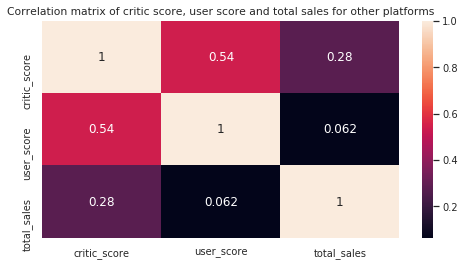

In [63]:
corrmap_other = other_platforms_df[['platform','critic_score','user_score','total_sales']]
plt.figure(figsize=(8,4));
sns.heatmap(corrmap_other.corr(), annot=True,annot_kws={'size': 12});
plt.title('Correlation matrix of critic score, user score and total sales for other platforms');

Для других платформ:

1) Коэффициент корреляции Пирсона между отзывами критиков и отзывами пользователей составляет 0.54. Корреляция положительная, но не высокая.

2) Корреляция между отзывами критиков и продажами также положительная, составляет 0.28. Коэффициент ниже, чем для одной платформы XOne. Ниже построим корреляционную матрицу отдельно для каждой платформы и увидим, корреляция между значениями продаж и оценкой критиков варьируется от 0.13 (PSV) до 0.41 (PS4)

3) Корреляция между продажами и отзывом пользователей практически отсутствует, коэффициент положительный, но составляет всего 0.06. Если посмотреть корреляционную матрицу отдельно для платформ, можем также увидеть, что коэффцициенты варьируются. Так, например, корреляция между продажами и отзывами пользователей составляет 0.23 для платформы 3DS и 0.39 для платформы WiiU. А для платформ PS4 и PC корреляция практически отсутствует.

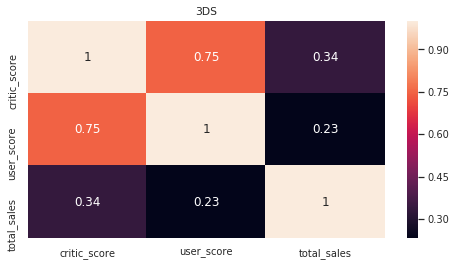

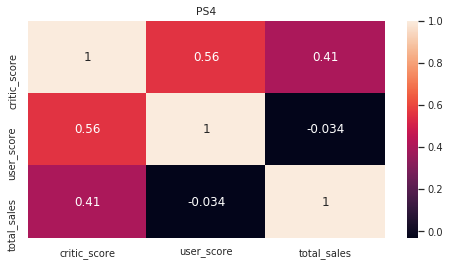

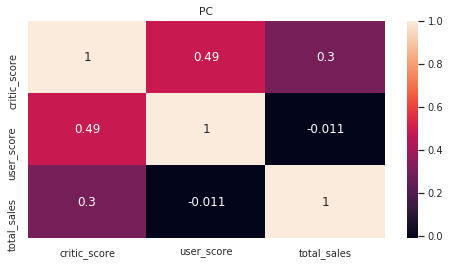

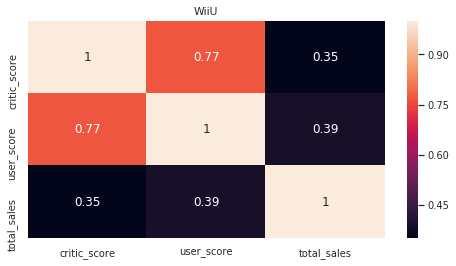

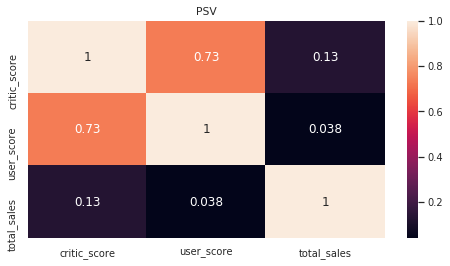

In [64]:
for platform in corrmap_other['platform'].unique():
    plt.figure(figsize=(8,4));
    sns.heatmap(corrmap_other.query('platform == @platform').corr(), annot=True,annot_kws={'size': 12});
    plt.title(platform);

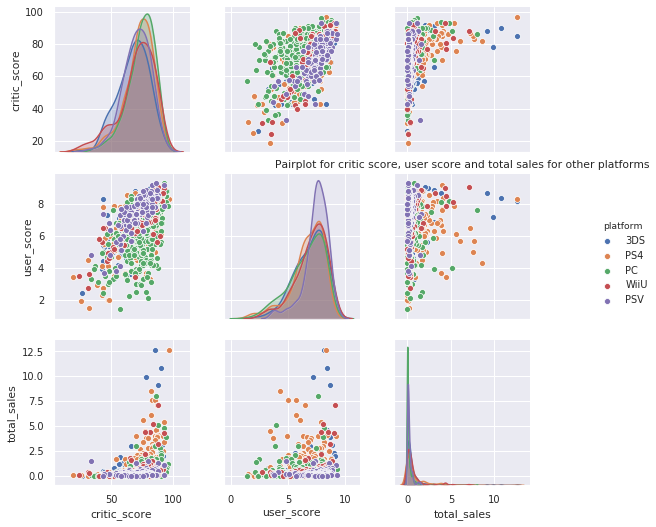

In [65]:
sns.pairplot(corrmap_other, hue='platform');
plt.title('Pairplot for critic score, user score and total sales for other platforms');

Диаграммы рассеивания для других платформ выглядят похожими на диаграммы платформы XOne. Каждая платформа имеет свои особенности: разные медианы оценок критиков и пользователей, разные зависимости между оценками и продажами, но общая картина по всем платформам вырисовывается:

* оценка критиков влияет на продажи положительно
* оценка пользователей практически не влияет на продажи, за исключением некоторых платформ

### 3.7. Анализ игр по жанрам. <a name="3.7step"></a>

**Задача:** Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим на распределение игр на отобранных 6 платформах по жанрам:

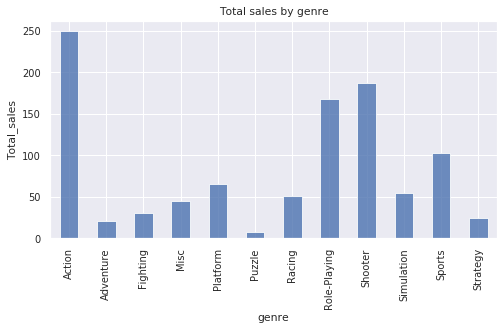

In [66]:
profit_games.groupby('genre')['total_sales'].sum().plot(kind='bar',alpha=0.8,figsize=(8, 4));
plt.ylabel('Total_sales');
plt.title('Total sales by genre');

На графике видно, что за период 8 лет на 6 платформах XOne, WiiU, PS4, 3DS, PC и PSV самыми прибыльными, а точнее принесшими максимульную **общую** прибыль, были игры жанра Action, затем по убыванию - Shooter и Role-Playing. Меньше всего прибыли принесли игры жанра Puzzle. Однако значит ли общая суммарная прибыль, что в целом одна игра в данном жанре более прибыльная, чем другая игра в другом жанре?

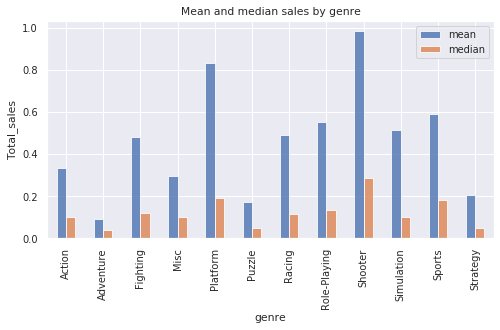

In [67]:
profit_games.groupby('genre')['total_sales'].agg({'mean','median'}).plot(kind='bar',alpha=0.8,figsize=(8, 4));
plt.ylabel('Total_sales');
plt.title('Mean and median sales by genre');

Видим, как координально изменилась ситуация с лидерами. На первом месте Shooter, на втором - Platform, затем Sports. Такое распределение первых трех мест по прибыльности одной игры прослеживается как по средним значениям, так и по медианным.

На графике видная сильная разница между средней стоимостью одной игры в рамках жанра и медианой. Вероятнее всего это связано с наличием популярных игр-бестселлеров в каждом из жанров, которые влияют на среднюю.

Посмотрим, как изменялись продажи по годам:

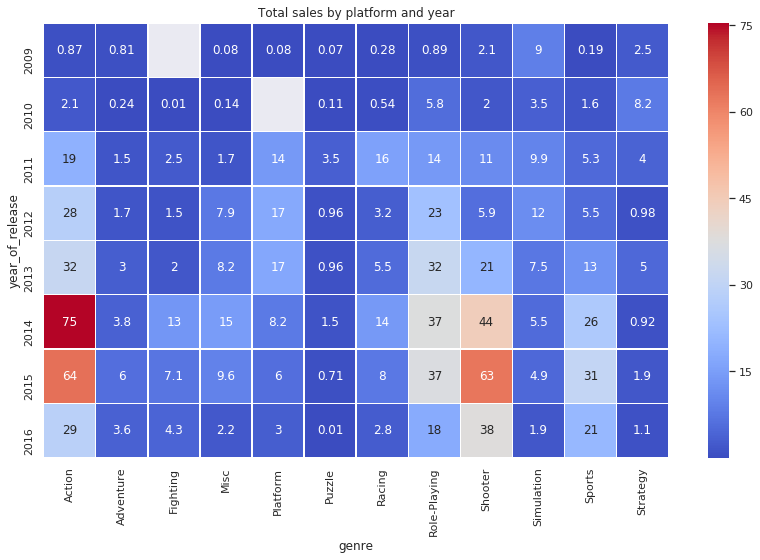

In [68]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['year_of_release','genre'])['total_sales'].sum().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4);
plt.title('Total sales by platform and year');

За исследуемый период на нашей выборке самыми суммарно прибыльными были продажи игр, выпущенных в 2014 и 2015 годах в жанрах Action и Shooter. Однако можно заметить, что в каждом году выпуска менялись лидеры по совокупным продажам. Так, например, в 2009 году самыми суммарно прибыльными были игры в жанре Simulation, а в 2010 - Strategy. Продажи игр, выпущенных в 2013 году, в жанрах Action и Role-Playing были одинаковыми, однако выпущенные в 2014 году игры в жанре Shooter сместили Role-Playing на третье место.

Это может быть связано с несколькими факторами: с количеством выпускаемых игр в том или ином жанре в определенном году; также с развитием технологий игры в жанрах Action и Shooter становятся все более захватывающими и привлекательными для пользователей, снизился "порог входа" для играющих и это привело к увеличению пользователей и продаж.

Проверим первое предположение о том, что высокая совокупная прибыль по определенным жанрам связано с увеличением выпуска игр:

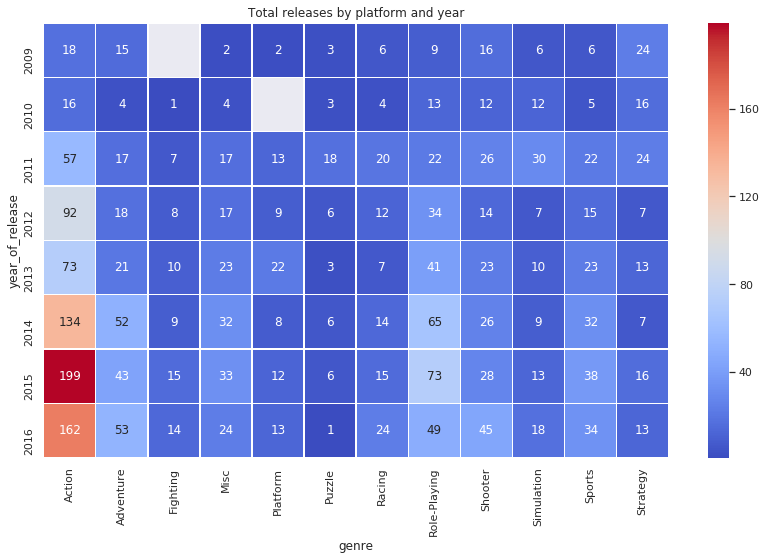

In [69]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['year_of_release','genre'])['total_sales'].count().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4,fmt='.3g');
plt.title('Total releases by platform and year');

Мы видим, что действительно количество игр в жанре Action резко увеличилось за период с 2011 по 2016 годы. Но также увеличилось и количество выпускаемых игр в жанре Adventure, например, что однако не привело к такому серьезному росту продаж.

Таким образом можно сказать, что несомненно частично рост прибыли от жанра обусловлен ростом выпуска игр в этом жанре, но это не единственный фактор.

И построим еще одну визуализацию. Мы уже посмотрели на общую прибыль, на  общий выпуск, посмотрим на среднюю прибыль (общая прибыль 1 жанра в 1 год деленная на общий выпуск 1 жанра в 1 год):

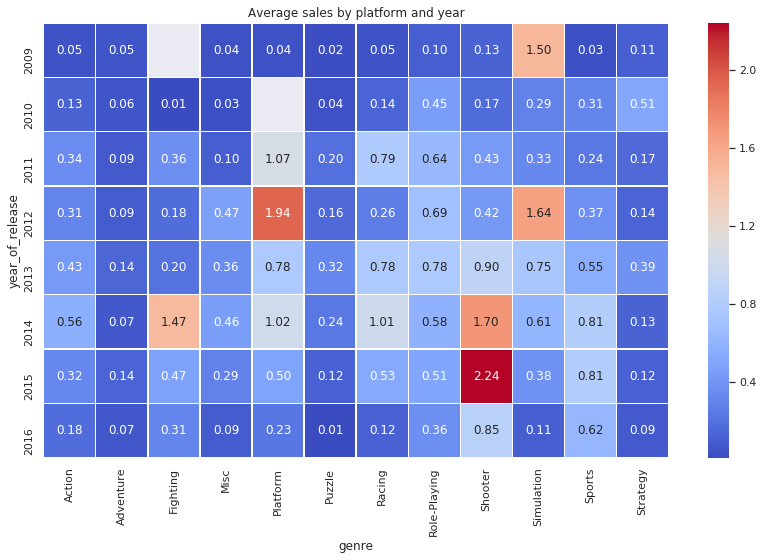

In [70]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['year_of_release','genre'])['total_sales'].mean().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4,fmt='.2f');
plt.title('Average sales by platform and year');

Посмотрим на жанр Action в 2013 и 2014 году: 
* прибыль за игры этого жанра, выпущенные в 2014 году увеличилась по сравнению с прибылью за игры, выпущенные в 2013 году на 134%
* при этом выпуск игр в 2014 году увеличился на 83%
* средняя прибыль за 1 игру увеличилась на 30%

Что еще раз подтверждает, что на рост общей прибыльности жанра влияет не только увеличение выпуска.

Если мы построим аналогичную визуализацию, но не по средней прибыли с 1 игры, а по медиане, то вероятнее всего увидим, что яркие точки с высокой прибылью на 1 игру вероятнее всего относятся к единичным играм-бестселлерам:

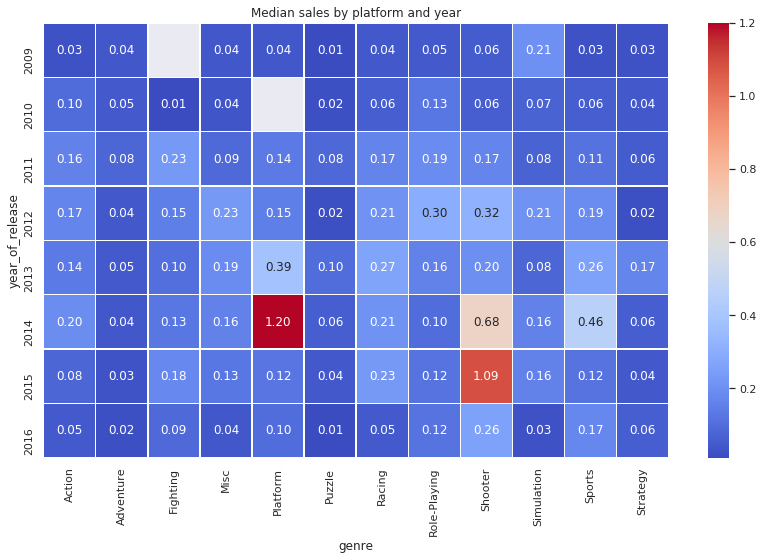

In [71]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['year_of_release','genre'])['total_sales'].median().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4,fmt='.2f');
plt.title('Median sales by platform and year');

По медиане картина более равномерная, с некоторыми выколотыми точками, природу которых необходимо исследовать дополнительно.

Посмотрим, как распределяется прибыль от игр в зависимости от жанра и платформы:

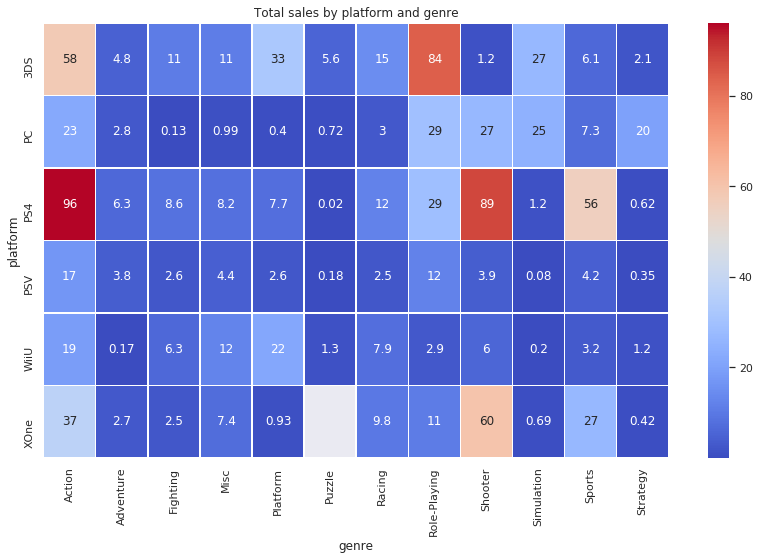

In [72]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['platform','genre'])['total_sales'].sum().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4);
plt.title('Total sales by platform and genre');

Такая визуализация позволяет увидеть, что не для каждой платформы игры, выпущенные в жанрах Action, Shooter и Role-Playing (топ-3 по продажам жанра) являются самыми прибыльными. Так, например, максимальная общая прибыль за игры на платформе WiiU относится к играм жанра Platform. У платформы PC максимальная совокупная прибыль получена была за игры жанра Role-Playing, при этом жанр Action для этой платформы находится на 4 месте по совокупным продажам.

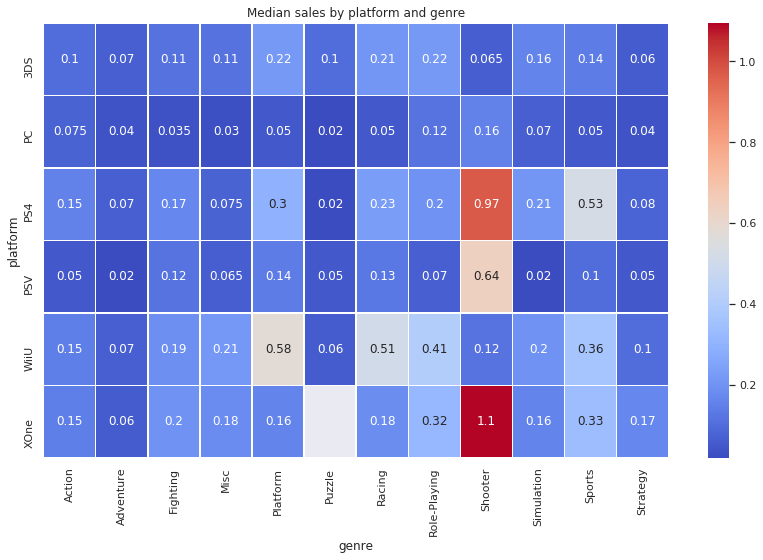

In [73]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby(['platform','genre'])['total_sales'].median().unstack()\
            , cmap='coolwarm', annot=True, linewidths=0.4);
plt.title('Median sales by platform and genre');

Если посмотреть на медиану по стоимости 1 игры в рамках одного жанра и одной платформы, то можно сделать такие выводы:
* для четырех платформ из шести (PC, PS4, PSV, XOne) одна игра жанра Shooter приносит больше всего прибыли
* для платформы 3DS самыми прибыльными в пересчете на 1 игру являются игры жанра Role-Playing, а для платформы WiiU - Platform.

Несомненно говоря о прибыльности жанра мы говорим и об общих продажах в рамках одного жанра, и о количестве выпуска, и о цене одной игры. Есть платформы, которые специализируются больше на определенных жанрах, под эти жанры выпускается больше игр на этих платформах, что в итоге дает большие продажи. Есть платформы, которые выпускают менее популярный жанр, меньшее количество игр, но при этом стоимость одной игры выше.

## Вывод.

В данном шаге был проведен анализ компьютерных игр с разных сторон. Посмотрим, какие выводы получилось сделать на основани проведенного анализа:

**1.** Пиковыми годами по выпуску компьютерных игр являлись 2008-2009 год. До этого была явно заметна тенденция на ежегодное увеличение выпуска, а после - на снижение выпуска.  

**2.** Самые высокие продажи за весь период приходятся на платформы DS, PS, PS2, PS3, DS, Wii, X360 и бОльшая часть продаж игр на этих платформах отмечается в Северной Америке. 

**3.** В Японии в течение периода с 1980 года по 2016 существовали собственные платформы и игры на них, которые больше нигде не продавались.  

**4.** Анализ жизненного цикла платформ показал, что в среднем за 8 лет платформа набирает обороты, выходит на пик по прибыли и исчезает с рынка. За этот период игры на платформе позволяют получить более 90% от общей прибыли за все игры на этой платформе. 

**5.** Определение жизненного цикла позволяет сузить период для исследования до 8 лет: с 2009 по 2016 год.  

**6.** Сужение периода исследования позволило проанализировать платформы, которые продавались в период с 2009 по 2016 года и выбрать несколько платформ продажи которых будут продолжаться как минимум в 2017 году: PS4, 3DS, XOne, WiiU, PSV, PC.  

**7.** Игры на платформах различаются по общим продажам с этих игр. Если расставить платформы по убыванию медиан продаж игр, список будет выглядеть следующим образом: XOne, WiiU, PS4, 3DS, PC, PSV.   

**8.** Анализ взаимосвязи между оценками пользователей, оценками критиков и продажами показал, что оценка критиков влияет на продажи положительно, а оценка пользователей в основном не влияет на продажи, за исключением некоторых платформ (3DS,WiiU).  

**9.** За период с 2009 по 2016 годы на самыми прибыльными, а точнее принесшими максимульную общую прибыль, были игры жанра Action, затем по убыванию - Shooter и Role-Playing. 

**10.** Было выявлено, что несомненно на увеличение прибыльности жанра влияет увеличение выпуска игр этого жанра, но это не единственный фактор. Влияет увеличение популярности жанра, новые игры-бестселлеры, большое количество положительных оценок критиков и т.д.  

**11.** Не для всех платформ жанр  Action является самым прибыльным. Максимальная общая прибыль за игры на платформе WiiU относится к играм жанра Platform, а на платформе PC - за игры жанра Role-Playing.

## Шаг 4. Анализ пользователей. <a name="4step"></a>

**Задача:** Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1. Самые популярные платформы по регионам. <a name="4.1step"></a>

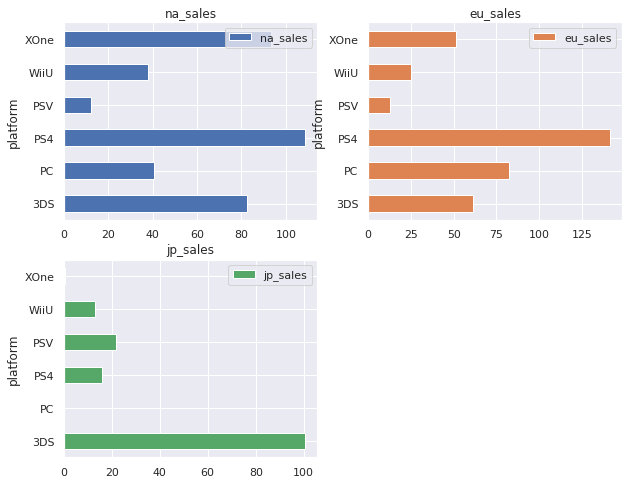

In [74]:
(profit_games.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()
                                .plot(subplots=True,kind='barh', figsize=(10,8),layout=(2,2),sharex=False)
);


На графиках видно, что для каждого региона складывается свой топ-5 платформ по совокупным продажам игр на этих платформах. Так, например, бросается в глаза, что на 1 месте у Северной Америки и Европы продажи игр на PS4, а у Японии эта платформа занимает самую низкую позицию (если не брать в расчет PC и XOne).

Что касается PC в Японии, нулевые значения продаж могут объясняются отсутствием в датасете игр от разработчиков, занимающихся производством игр для японского рынка, а также неполнотой информации в датасете. Что касается XOne, данная платформа действительно не смогла стать популярной на японском рынке.

Построим таблицы, в которых проранжируем платформы в порядке убывания доли продаж от них И выведем топ-5:

In [75]:
for region in profit_games[['na_sales','eu_sales','jp_sales']].columns:
    print('\033[1m' + region)
    data_grouped = profit_games.loc[profit_games[region] != 0].pivot_table(index='platform',values=region, aggfunc={'sum','count',lambda x:x.sum()/profit_games[region].sum()})
    data_grouped.columns=['% of sales','games amount','sales']
    data_sorted = data_grouped.sort_values(by='% of sales', ascending=False).head(5)
    data_sorted['mean'] = data_sorted['sales']/data_sorted['games amount']
    display(data_sorted)

na_sales


,% of sales,games amount,sales,mean
platform,,,,
PS4,0.29,294,108.74,0.37
XOne,0.25,227,93.12,0.41
3DS,0.22,260,82.65,0.32
PC,0.11,261,40.49,0.16
WiiU,0.10,122,38.10,0.31


eu_sales


,% of sales,games amount,sales,mean
platform,,,,
PS4,0.38,290,141.09,0.49
PC,0.22,547,82.32,0.15
3DS,0.16,247,61.27,0.25
XOne,0.14,218,51.59,0.24
WiiU,0.07,125,25.13,0.20


jp_sales


,% of sales,games amount,sales,mean
platform,,,,
3DS,0.66,358,100.62,0.28
PSV,0.14,365,21.84,0.06
PS4,0.11,223,15.96,0.07
WiiU,0.09,67,13.01,0.19
XOne,0.00,22,0.34,0.02


Итак, теперь у нас есть представление о топ-5 игровых платформ для каждого из регионов. Сделаем выводы по каждому из регионов:

**1. Северная Америка**  
Лидером по продажам среди платформ в Северной Америке является платформа **PS4**, официально вышедшая на американский рынок в ноябре 2013 года.  
Следующая платформа по убыванию - **XOne**, которая также вышла на рынок в ноябре 2013 года. Количество выпущенных игр продаваемых на рынке Северной Америки на эту платформу,  на 23% меньше, чем количество игр на PS4, что вероятно и является причиной "второго места".  
Треться в списке - **Nintendo 3DS**, на рынке с марта 2011 года. Несмотря на то, что данная платформа на рынке дольше, чем PS4 и XOne, а также несмотря на то, что количество выпущенных игр на этой платформе всего на 13% меньше, чем количество игр на PS4, тем не менее данная платформа находится на 3м месте, в том числе вероятно за счет более низкой стоимости игр или за счет отсутствия игр-бестселлеров на рынке.  

На четвертом и пятом местах - PC и WiiU. Средние продажи игры на PC почти в 2 раза меньше, чем на WiiU, однако общие продажи на PC выше, вероятно за счет количества выпускаемых игр, оно выше на 114%.

**2. Европа**  
Лидером на рынке Европы также является платформа **PS4**. Интересно, что средние продажи за 1 игру на этой платформе в Европе выше, чем в Северной Америке. Действительно, если посмотреть на список топ-5 игр на платформе PS4 в Северной Америке и в Европе, то увидим, что в Европе в топе игры с более высокими продажами (см. под этим выводом).  
Следом мы видим платформу **PC**. В Европе игры на персональных компьютерах вероятно более популярны, их количество почти в 2 раза больше, чем в Северной Америке, при этом средние продажи 1 игры примерно равны.  
Завершает топ-3 платформа **3DS**.  

На четвертом и пятом местах - XOne (который в Северной Америке на втором месте) и WiiU. Интересно заметить, что средние продажи одной игры на этих платформах существенно ниже, чем в Америке. 

**3. Япония**

Игровой рынок в Японии существенно отличается от рынка других рассматриваемых регионов. Лидером на рынке Японии является платформа **Nintendo 3DS**, следом за ней - **PSV**, обе платформы были выпущены в 2011 году, но 3DS в марте, а PSV в декабре. При этом количество выпущенных игр на PSV незначительно, не превышает количество выпущенных на 3DS, однако средние продажи одной игры на PSV значительно ниже, возможно это связано со стоимостью игр на этой платформе.  
Игры на **PS4** в Японии менее популярны, чем в других регионах. Даже если сравнить по одной из самых популярных игр Grand Theft Auto V: продажи в Северной Америке составили 3,96 млн долларов, в Европе - 6,31 млн долларов, а в Японии - 0,38 млн долларов. Возможно это связано с жанрами игр, Япония отличается от других регионов предпочтениями.

Замыкают пятерку WiiU и XOne, с совсем небольшим выпуском игр.

In [76]:
games.query('platform == "PS4" and year_of_release >= 2009')[['name','na_sales']].sort_values(by='na_sales',ascending=False).head(5)

,name,na_sales
31,Call of Duty: Black Ops 3,6.03
42,Grand Theft Auto V,3.96
87,Star Wars Battlefront (2015),2.99
92,Call of Duty: Advanced Warfare,2.81
105,Fallout 4,2.53


In [77]:
games.query('platform == "PS4" and year_of_release >= 2009')[['name','eu_sales']].sort_values(by='eu_sales',ascending=False).head(5)

,name,eu_sales
42,Grand Theft Auto V,6.31
77,FIFA 16,6.12
31,Call of Duty: Black Ops 3,5.86
94,FIFA 17,5.75
143,FIFA 15,4.33


In [78]:
games.query('platform == "PS4" and year_of_release >= 2009')[['name','jp_sales']].sort_values(by='jp_sales',ascending=False).head(5)

,name,jp_sales
390,Metal Gear Solid V: The Phantom Pain,0.49
1028,Knack,0.42
42,Grand Theft Auto V,0.38
2766,Dragon Quest Heroes: The World's Tree Woe and ...,0.37
5074,Persona 5,0.37


### 4.2. Самые популярные жанры по регионам. <a name="4.2step"></a>

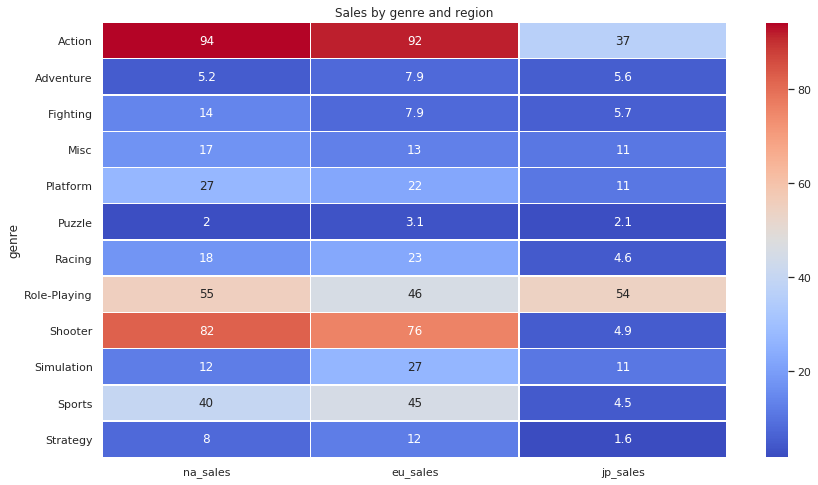

In [79]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)
sns.heatmap(profit_games.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()\
            , cmap='coolwarm', annot=True, linewidths=0.4);
plt.title('Sales by genre and region');

Данная визуализация наглядно показывает различие в предпочтениях игроков их разных регионов, а особенно из Японии. В то время как жанр Action приносит самые высокие продажи в Северной и Америке, в Японии этот жанр следует за жанром Role-Playing. Также мы видим, что популярные в Европе и Америке жанры Shooter и Sports намного меньше привлекают игроков из Японии.

Выведем топ-5 жанров для каждого региона:

In [80]:
for region in profit_games[['na_sales','eu_sales','jp_sales']].columns:
    print('\033[1m' + region)
    data_grouped = profit_games.loc[profit_games[region] != 0].pivot_table(index='genre',values=region, aggfunc={'sum','count',lambda x:x.sum()/profit_games[region].sum()})
    data_grouped.columns=['% of sales','games amount','sales']
    data_sorted = data_grouped.sort_values(by='% of sales', ascending=False).head(5)
    data_sorted['mean'] = data_sorted['sales']/data_sorted['games amount']
    display(data_sorted)

na_sales


,% of sales,games amount,sales,mean
genre,,,,
Action,0.25,437,94.25,0.22
Shooter,0.22,160,82.43,0.52
Role-Playing,0.15,163,55.39,0.34
Sports,0.11,110,40.06,0.36
Platform,0.07,68,26.97,0.40


eu_sales


,% of sales,games amount,sales,mean
genre,,,,
Action,0.25,492,91.97,0.19
Shooter,0.20,167,75.99,0.46
Role-Playing,0.12,180,45.67,0.25
Sports,0.12,138,45.05,0.33
Simulation,0.07,82,26.70,0.33


jp_sales


,% of sales,games amount,sales,mean
genre,,,,
Role-Playing,0.36,213,54.19,0.25
Action,0.24,360,36.54,0.10
Platform,0.07,32,10.71,0.33
Misc,0.07,84,10.70,0.13
Simulation,0.07,26,10.64,0.41


Какие выводы можно сделать по полученной информации:

**Северная Америка и Европа**  
Регионы объединены, поскольку их топ-5 самых продаваемых жанров идентичны, за исключением последнего жанра из топа. 
Лидером в обоих регионах является жанр Action, за ним следует по сути один из поджанров жанра Action - Shooter. Однако между регионами все же есть небольшое отличие - на Европейском рынке продавалось больше игр этих жанров в количесвтенном выражении, но средние продажи от одной игры меньше, чем в Америке.
За этими двумя жанрами следуюет жанр ролевых игр (Role-Playing), затем Sports и замыкает топ-5 жанр Platform для Северной Америки и жанр Simulation для Европы.

**Япония**  
Результаты по Японии не сказать, чтобы координально отличались, но тем не менее различия имеются. Так, например, самыми прибыльными играми за 2009-2016 год были игры в жанре ролевых игр. Количество продаваемых игр, выпущенных в этом жанре, превышало количество игр данного жанра в Америке или Европе.
Лидер по продажам в Америке и Европе жанр Action тоже занимает хорошую позицию в Японии, хотя при этом средние продажи одной игры в Японии существенно ниже, чем в Америке или Европе - 0,1 млн долларов в Японии против 0.22 млн в Америке и 0.19 млн долларов в Европе.
Последние 3 места практически поровну по доле в продажах делят три жанра: Platform, Misc и Simulation.

### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе? <a name="4.3step"></a>

In [81]:
profit_games['rating'].value_counts()

T       405
M       375
E       320
E10+    262
EC        2
RP        1
Name: rating, dtype: int64

Игры датасета, который включает в себя продажи в течение 2009-2016 гг. 6 платформ, продажи которых планируются как минимум на 2017 год, получали следующие рейтинги ESRB: T, M, E, E10+, EC и RP.

Что из себя представляет каждый из этих рейтингов:  
**T** - подростковые игры, предназначенные для лиц старше 13 лет  
**M** - для взрослых, предназначены для возраста старше 17 лет  
**E** - для всех, начиная с 6 лет  
**E10+** - для всех от 10 лет и старше  
**EC** - для детей младшего возраста, от 3 лет  
**RP** - рейтинг ожидается, т.е. пока игре рейтинг не присвоен, ожидается оценка организацией  

Посмотрим, как распределяются продажи в регионах  в зависимости от рейтингов игры:

In [82]:
for region in profit_games[['na_sales','eu_sales','jp_sales']].columns:
    print('\033[1m' + region)
    data_grouped = profit_games.loc[profit_games[region] != 0].pivot_table(index='rating',values=region, aggfunc={'sum','count',lambda x:x.sum()/profit_games[region].sum()})
    data_grouped.columns=['% of sales','games amount','sales']
    data_sorted = data_grouped.sort_values(by='% of sales', ascending=False)
    data_sorted['mean'] = data_sorted['sales']/data_sorted['games amount']
    display(data_sorted)

na_sales


,% of sales,games amount,sales,mean
rating,,,,
M,0.30,303,113.66,0.38
E,0.22,224,81.41,0.36
T,0.14,264,54.39,0.21
E10+,0.12,219,46.10,0.21
EC,0.00,2,0.09,0.04


eu_sales


,% of sales,games amount,sales,mean
rating,,,,
M,0.32,343,119.18,0.35
E,0.22,271,83.52,0.31
T,0.16,330,59.21,0.18
E10+,0.09,233,35.28,0.15
RP,0.00,1,0.03,0.03


jp_sales


,% of sales,games amount,sales,mean
rating,,,,
E,0.20,85,29.76,0.35
T,0.11,149,16.50,0.11
M,0.06,107,9.28,0.09
E10+,0.05,66,8.32,0.13


na_sales


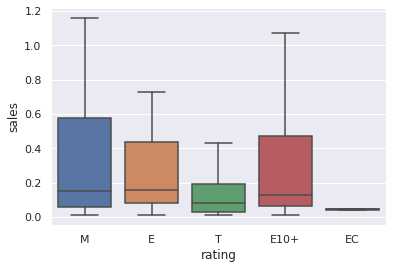

eu_sales


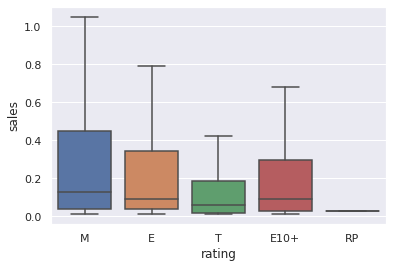

jp_sales


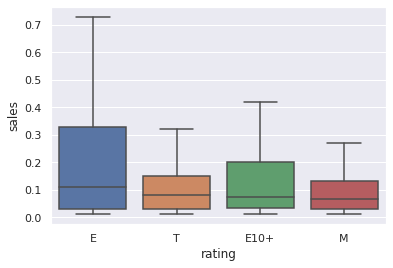

In [83]:
for region in profit_games[['na_sales','eu_sales','jp_sales']].columns:
    print('\033[1m' + region)
    data_grouped = profit_games.loc[profit_games[region] != 0].pivot_table(index=['rating','name'],values=region,aggfunc='sum').reset_index()
    data_grouped.columns=['rating','name','sales']
    data_sorted = data_grouped.sort_values(by='sales',ascending=False)
    sns.boxplot(data=data_sorted,x='rating',y='sales',showfliers=False)
    plt.show()

na_sales


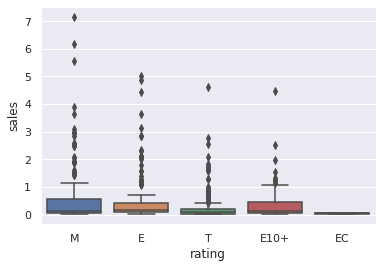

eu_sales


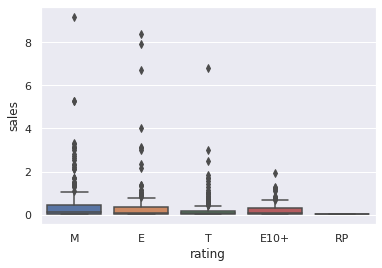

jp_sales


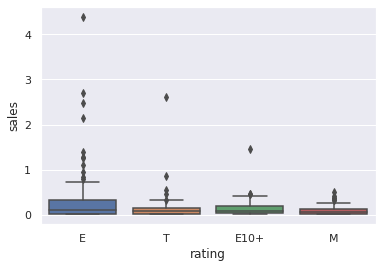

In [84]:
for region in profit_games[['na_sales','eu_sales','jp_sales']].columns:
    print('\033[1m' + region)
    data_grouped = profit_games.loc[profit_games[region] != 0].pivot_table(index=['rating','name'],values=region,aggfunc='sum').reset_index()
    data_grouped.columns=['rating','name','sales']
    data_sorted = data_grouped.sort_values(by='sales',ascending=False)
    sns.boxplot(data=data_sorted,x='rating',y='sales',showfliers=True)
    plt.show()

В Северной Америке и Европе игры с рейтингом M (для взрослых) лидируют как по доле продаж, так и по количеству выпускаемых игр. Следом по убыванию доли продаж мы видим рейтинг E (для всех старше 6 лет), T (от 13 лет) и E10+ (от 10 лет). Если посмотреть на диаграмму размаха, можно заметить, что в целом игры с рейтингом M имеют более широкое распределение, рейтинг E поуже и рейтинг T еще уже.  

В Японии лидером по доле продаж являются игры с рейтингом E, затем T, затем M и E10+. Однако можно заметить, что у гораздо меньшего количества игр, продаваемых в Японии, имеется рейтинг ESRB. Вероятно игры, выпускаемые непосредственно в Японии более распространены в этой стране у и этих игр рейтинг организации CERO, которая выставляет рейтинги на игры, произведенные в Японии.

И в Северной Америке, и в Европе, самая низкая медиана (за исключением редких рейтингов EC и RP) наблюдается у игр для подростков от 13 лет (T). Для игр других рейтингов медиана в целом не координально отличается.

## Вывод.

В данном шаге мы принимали во внимание региональные различия. 

Было выявлено, что для Северной Америки и для Европы лидером по продажам является платформа PS4. В Америке на втором месте XOne, в Европе - PC. На третьем месте и у Америки, и у Европы платформа 3DS.
Игровой рынок в Японии существенно отличается от рынка других рассматриваемых регионов. Лидером на рынке Японии является платформа Nintendo 3DS, следом за ней - PSV, лишь затем PS4, лидер в Америке и Европе.

Что касается жанров игр, то для Америки и Европы топ-3 жанров по продажам выглядит одинаково: Action -> Shooter -> Role-Playing. Япония же отличается не только особыми предпочтениями в платформах, но и особыми предпочтениями в жанрах игр, для Японии топ-3 выглядит так: Role-Playing -> Action -> Platform.

Также в рамках данного исследования было проанализировано, влияет ли рейтинг ESRB на продажи. В целом можно сказать, что в целом на продажи влияет то, для какого возраста игра предназначена. В Северной Америке и Европе более распространены игры для взрослых (от 17 лет). Интересно, что игры для подростков (от 13 лет) приносят меньше продаж, чем игры от 6 лет. Вероятно  это связано с тем, что подросткам от 13 до 17 лет уже интереснее играть в игры, предназначенные для взрослых и они покупают игры с рейтингом 17+ (М).

Для Японии ситуация отличается и игры для взрослых занимают третье место по доле продаж. Более популярными являются игры для всех от 6 лет и для подростков от 13 лет. Однако нельзя делать однозначные выводы по Японии, поскольку у большого количества игр, продаваемых в Японии, отсутсвует рейтинг ESRB.

## Шаг 5. Проверка гипотез. <a name="5step"></a>

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <a name="5.1step"></a>

In [85]:
scores_df['user_score'].isnull().sum()

0

Сформулируем гипотезы:

**H₀**: средние пользовательские рейтинги платформ Xbox One и PC равны  
**H₁**: средние пользовательские рейтинги не равны

Проверять гипотезы будем при уровне значимости равном 5%.

Нам необходимо проверить, значима ли разница между средними пользовательскими рейтингами двух платформ?

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), t-теста . У нас нет оснований полагать, что выборки взяты из схожих по параметрам ген совокупностей, поэтому параметр equal_var передадим, как equal_var = False.

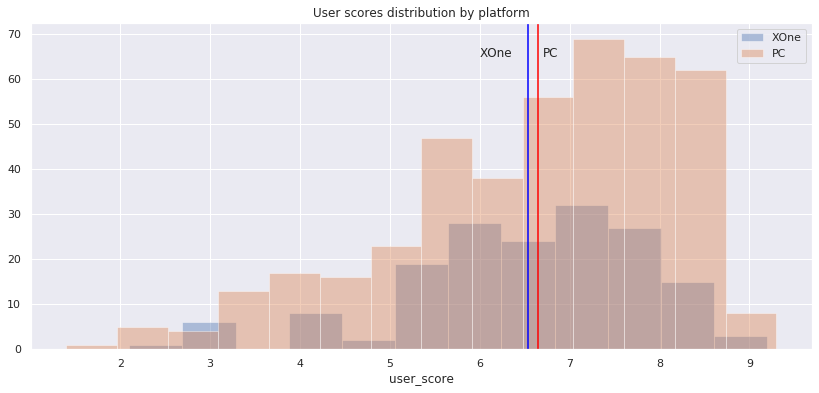

In [86]:
plt.figure(figsize=(14, 6));
for platform in ['XOne','PC']:
    sns.distplot(scores_df.query('platform == @platform')['user_score'],label=platform,kde=False);
    plt.legend(['XOne','PC'])
    plt.title('User scores distribution by platform')
    

plt.axvline(scores_df.query('platform == "XOne"')['user_score'].mean(), c='blue');
plt.axvline(scores_df.query('platform == "PC"')['user_score'].mean(), c='red');
plt.text(6,65, "XOne")
plt.text(6.7,65, "PC")
plt.show()

In [87]:
(scores_df.query('platform == "XOne" or platform == "PC"')
          .pivot_table(index='platform',values='user_score',aggfunc=({'mean','median'}))
)

,mean,median
platform,,
PC,6.65,6.95
XOne,6.54,6.80


Средние пользовательские рейтинги действительно выглядят не сильно отличающимися для двух разных платформ.
Мы видим, что основная часть игр как на платформе PC, так и на платформе XOne, имеет пользовательскую оценку приблизительно от 5,5 до 8,5.

In [88]:
xone = scores_df.query('platform == "XOne"')['user_score']
pc = scores_df.query('platform == "PC"')['user_score']

In [89]:
alpha = .05

In [90]:
results_by_platform = st.ttest_ind(
    xone, 
    pc,
    equal_var = False)

In [91]:
print('p-значение:',(results_by_platform.pvalue))
if (results_by_platform.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4036691560694373
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние значения пользовательсих рейтингов для платформ PC и XOne отличаются, однако с вероятностью 58% такое или большее различие можно получить случайно при том, что нулевая гипотеза верна. На основании проведенного теста нельзя делать вывод о значимом различии между средними значениями.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные. <a name="5.2step"></a>

Сформулируем гипотезы:

**H₀**: средние пользовательские рейтинги жанров Action и Sport равны  
**H₁**: средние пользовательские рейтинги не равны

Проверять гипотезы будем при уровне значимости равном 5%.

Нам необходимо проверить, значима ли разница между средними пользовательскими рейтингами двух разных жанров?

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), t-теста . У нас нет оснований полагать, что выборки взяты из схожих по параметрам ген совокупностей, поэтому параметр equal_var передадим, как equal_var = False.

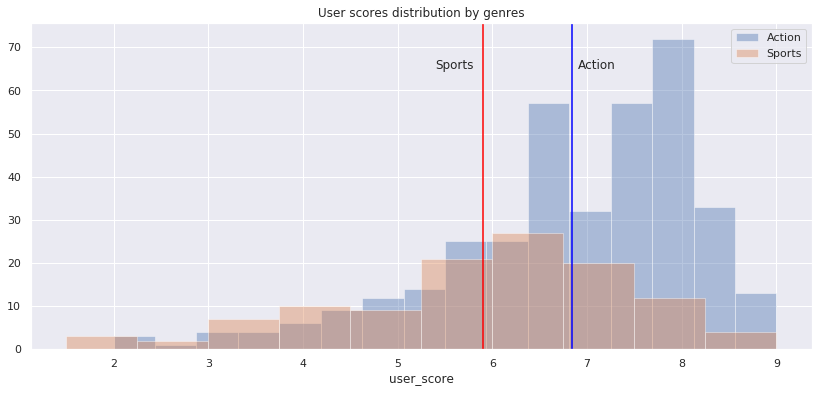

In [92]:
plt.figure(figsize=(14, 6));
for genre in ['Action','Sports']:
    sns.distplot(scores_df.query('genre == @genre')['user_score'],label=genre,kde=False);
    plt.legend(['Action','Sports'])
    plt.title('User scores distribution by genres')
    

plt.axvline(scores_df.query('genre == "Action"')['user_score'].mean(), c='blue');
plt.axvline(scores_df.query('genre == "Sports"')['user_score'].mean(), c='red');
plt.text(6.9,65, "Action")
plt.text(5.4,65, "Sports")
plt.show()

In [93]:
(scores_df.query('genre == "Action" or genre == "Sports"')
          .pivot_table(index='genre',values='user_score',aggfunc=({'mean','median'}))
)

,mean,median
genre,,
Action,6.84,7.10
Sports,5.90,6.10


In [94]:
action = scores_df.query('genre == "Action"')['user_score']
sports = scores_df.query('genre == "Sports"')['user_score']

In [95]:
alpha = .05

In [96]:
results_by_genre = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

In [97]:
print('p-значение:',(results_by_genre.pvalue))
if (results_by_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7409747176704192e-08
Отвергаем нулевую гипотезу


Итак, при уровне значимости,равном 5%, нулевая гипотеза H₀ о том, что средние пользовательские рейтинги жанров Action и Sport равны, может быть отклонена. Различия между средними пользовательскими рейтингами жанров могут считаться статистически значимыми.

## Вывод.

В данном шаге были проверены 2 гипотезы, касающиеся пользовательского рейтинга игр:

**1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

При уровне значимости, равном 5% данная гипотеза не можеть быть отвергнута. С вероятностью 40% различия в средней пользовательской оценке могут быть получены случайно при условии, что гипотеза верна. 

Средняя оценка пользователей для игр на платформе PC составляет 6.65, а для игр на платформе XOne - 6.54.

**2) Средние пользовательские рейтинги жанров Action и Sports разные**

При уровне значимости, равном 5% данная гипотеза была отвергнута. Различия между средними значениями пользовательского рейтинга в зависимости от жанра Action или Sports могут считаться статистически достоверными.


# Шаг 6. Общий вывод. <a name="6step"></a>

Целью данного проекта являлось выявление закономерностей, определяющих успешность компьютерных игр. Для этого мы проанализировали исторические данные о продажах компьютерных игр на разных платформах, в разных жанрах, а также в разных регионах. 

**Итак, что же влияет на успешность компьютерных игр?**  

На успешность компьютерных игр влияет несколько различных  факторов, в том числе:
1. Платформа для игры. Самые прибыльные на момент 2016 года платформы - PS4, XOne, 3DS. На PC и WiiU также продолжают выпускать и продавать игры, однако они менее прибыльные.  
2. Жанры игр. Среди наиболее популярных и прибыльных жанров на 2016 год - Action, Shooter и Role-Playing. Наименее прибыльные - Puzzle и Adventure.  
3. Оценка критиков на игру. Наличие высокой оценки критиков на игру может повлиять на увеличение успешности игры и наоборот.  


Несомненно наше исследование можно расширить и найти дополнительные факторы, влияющие на успешность игр. Как пример, на успешность игры может влиять и разработчик/издатель игры. Некоторые разработчики/издатели известны своими играми-бестселлерами, к ним заведомо выше доверие у пользователей, которое в более высокой долей вероятности оправдается. Игры некрупных, новых разработчиков/издателей могут оставаться в тени и быть неуспешными и плохо продаваемыми.

По моему мнению для планирования рекламных кампаний в интернет-магазине "Стримчик", необходимо также проанализировать поведение клиентов этого магазина, поскольку как мы уже видели из нашего анализа, предпочтения могут разниться по регионам, также они могут разниться и у клиентов интернет-магазина.  
Так, например, если ранее интернет-магазин "Стримчик" в основном имел клиентов-любителей жанра Platform и возможно это был единственный магазин, предлагающий игры такого жанра, то запланировать большие рекламные компании только на игры жанра Action и Shooter, как самые популярные жанры в Америке и Европе, будет не совсем правильно. Агрессивная реклама жанра, который не интересен текущей клиентуре, может привести к потере этих клиентов.

Если предположить, что средний клиент интернет-магазина "Стримчик" похож на среднего любителя игр из США или Европы, то **моими рекомендациями магазину будут**:  
1) Проверить ассортимент игр на наличие в них игр на платформы с уже закончившимся жизненным циклом. Конечно еще какое-то время после завершения производства платформы еще будут продаваться игры на них, однако прибыльность продажи этих игр будет под вопросом.  
2) Оставить в ассортименте на 2017 год только игры на платформы PS4, XOne, 3DS, PC, WiiU. 
3) Запустить рекламные кампании на игры жанров Action, Shooter и Role-Playing.  
4) Проверить, влияют ли оценки критиков и пользователей с какого-либо агрегатора отзывов на продажи в интернет-магазине. Провести тестирование на нескольких выборках, проверить гипотезу. Если пользователи магазина склонны доверять оценке критиков при покупке, то в рекламной кампании сделать на это акцент. 